# Problem Statement - I

#### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## Sourcing the data from csv file

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings(action="ignore")

Importing the libraries 

In [2]:
import pandas as pd
import numpy as np

##Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Open the Data: Application_data.csv

In [3]:
df = pd.read_csv("application_data.csv")

In [4]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
df.shape

(307511, 122)

In [6]:
#Checking the data types of features

In [7]:
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### Checking and finding the percentage of Null & missing values

In [9]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

##### Checking Percentage of Null Value's in dataframe usning function

In [10]:
def Missing_Values(dataframe):
    return round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending = False),3)

##### Finding the percentage of features

In [11]:
Missing_Values(df)

COMMONAREA_MEDI             69.872
COMMONAREA_AVG              69.872
COMMONAREA_MODE             69.872
NONLIVINGAPARTMENTS_MODE    69.433
NONLIVINGAPARTMENTS_AVG     69.433
                             ...  
NAME_HOUSING_TYPE            0.000
NAME_FAMILY_STATUS           0.000
NAME_EDUCATION_TYPE          0.000
NAME_INCOME_TYPE             0.000
SK_ID_CURR                   0.000
Length: 122, dtype: float64

## Data Cleaning & Manupulating 

### Ideally more than 40% of data in feeatures is containing missing values then we have to drop that features

#### Checking the features has missing value more than 40% 

In [12]:
print(Missing_Values(df)[Missing_Values(df) > 40])

COMMONAREA_MEDI                 69.872
COMMONAREA_AVG                  69.872
COMMONAREA_MODE                 69.872
NONLIVINGAPARTMENTS_MODE        69.433
NONLIVINGAPARTMENTS_AVG         69.433
NONLIVINGAPARTMENTS_MEDI        69.433
FONDKAPREMONT_MODE              68.386
LIVINGAPARTMENTS_MODE           68.355
LIVINGAPARTMENTS_AVG            68.355
LIVINGAPARTMENTS_MEDI           68.355
FLOORSMIN_AVG                   67.849
FLOORSMIN_MODE                  67.849
FLOORSMIN_MEDI                  67.849
YEARS_BUILD_MEDI                66.498
YEARS_BUILD_MODE                66.498
YEARS_BUILD_AVG                 66.498
OWN_CAR_AGE                     65.991
LANDAREA_MEDI                   59.377
LANDAREA_MODE                   59.377
LANDAREA_AVG                    59.377
BASEMENTAREA_MEDI               58.516
BASEMENTAREA_AVG                58.516
BASEMENTAREA_MODE               58.516
EXT_SOURCE_1                    56.381
NONLIVINGAREA_MODE              55.179
NONLIVINGAREA_AVG        

In [13]:
print(Missing_Values(df)[Missing_Values(df) > 40].count())

49


#### As 49 Features having 40% of missing values it is easy to drop it rather than playing with it takes lot of time

Creating variable so it is easy to drop it at once

In [14]:
Missing_50values = Missing_Values(df)[Missing_Values(df) > 40]

In [15]:
Missing_50values

COMMONAREA_MEDI                 69.872
COMMONAREA_AVG                  69.872
COMMONAREA_MODE                 69.872
NONLIVINGAPARTMENTS_MODE        69.433
NONLIVINGAPARTMENTS_AVG         69.433
NONLIVINGAPARTMENTS_MEDI        69.433
FONDKAPREMONT_MODE              68.386
LIVINGAPARTMENTS_MODE           68.355
LIVINGAPARTMENTS_AVG            68.355
LIVINGAPARTMENTS_MEDI           68.355
FLOORSMIN_AVG                   67.849
FLOORSMIN_MODE                  67.849
FLOORSMIN_MEDI                  67.849
YEARS_BUILD_MEDI                66.498
YEARS_BUILD_MODE                66.498
YEARS_BUILD_AVG                 66.498
OWN_CAR_AGE                     65.991
LANDAREA_MEDI                   59.377
LANDAREA_MODE                   59.377
LANDAREA_AVG                    59.377
BASEMENTAREA_MEDI               58.516
BASEMENTAREA_AVG                58.516
BASEMENTAREA_MODE               58.516
EXT_SOURCE_1                    56.381
NONLIVINGAREA_MODE              55.179
NONLIVINGAREA_AVG        

We want just features name so easy to drop it

In [16]:
Missing_50values.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

#### Dropping the features once by using the variable (Missing_50values)

### Creating new dataset (df1) to create changes in new dataset also also original data is also secure

In [17]:
df1 = df.drop(columns=Missing_50values.index)

In [18]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

##### Checking shape of new dataset And also ensuring deletion of features is dnoe

In [19]:
df1.shape

(307511, 73)

Again checking the null values in dataset

In [20]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

In [21]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

##### Checking th remaining features

In [22]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### Handling missing values


##### Imputing mean/Median if required

### AMT_ANNUITY

In [23]:
df1.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [24]:
df1.AMT_ANNUITY.isnull().sum()

12

##### Ploting boxplot for the AMT_ANNUITY for imputaton decision

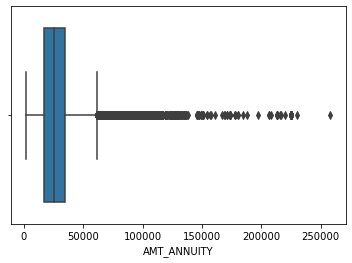

In [25]:
sns.boxplot(df1.AMT_ANNUITY)
plt.show()

Find median of "MT_ANNUITY"

In [26]:
df1.AMT_ANNUITY.median()

24903.0

In [27]:
df1.AMT_ANNUITY.mean()

27108.573909183444

##### As we clearly seen the Outliers in the boxplot
##### we have to Impute the null values with Median 

In [28]:
df1['AMT_ANNUITY'] = df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.median())

Checking the Null values again

In [29]:
df1.AMT_ANNUITY.isnull().sum()

0

In [30]:
df1.AMT_ANNUITY.median()

24903.0

### AMT_GOODS_PRICE

In [31]:
df1.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [32]:
# Checking null values in the AMT_GOODS_PRICE feature
df1.AMT_GOODS_PRICE.isnull().sum()

278

Checking Outliers in the above feature

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

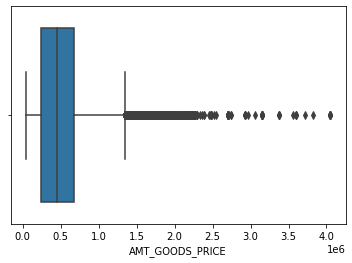

In [33]:
sns.boxplot(df1.AMT_GOODS_PRICE)

In [34]:
# As seen outliers take median
df1["AMT_GOODS_PRICE"].median()

450000.0

In [35]:
df1['AMT_GOODS_PRICE'] = df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE.median())

In [36]:
df1.AMT_GOODS_PRICE.isnull().sum()

0

Chechking the closeness of AMT_GOODS_PRICE & AMT_CREDIT features

In [37]:
df1[["AMT_GOODS_PRICE",'AMT_CREDIT']]

AMT_GOODS_PRICE  AMT_CREDIT
0              351000.0    406597.5
1             1129500.0   1293502.5
2              135000.0    135000.0
3              297000.0    312682.5
4              513000.0    513000.0
...                 ...         ...
307506         225000.0    254700.0
307507         225000.0    269550.0
307508         585000.0    677664.0
307509         319500.0    370107.0
307510         675000.0    675000.0

[307511 rows x 2 columns]

### NAME_TYPE_SUITE

In [38]:
df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [39]:
df1.NAME_TYPE_SUITE.isnull().sum()

1292

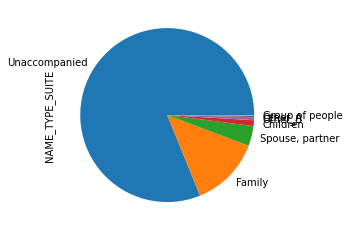

In [40]:
df1.NAME_TYPE_SUITE.value_counts(normalize= True).plot.pie()

plt.show()

In [41]:
#Replacing the null values by mode (Unaccompanied) for this categorical variable

In [42]:
df1["NAME_TYPE_SUITE"] = df1.NAME_TYPE_SUITE.fillna("Unaccompanied") 

In [43]:
# Checking null values again
df1.NAME_TYPE_SUITE.isnull().sum()

0

In [44]:
df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### OCCUPATION_TYPE
Percentage of each category present in "OCCUPATION_TYPE"

In [45]:
df1["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

checking the null value count

In [46]:
df1.OCCUPATION_TYPE.isnull().sum()

96391

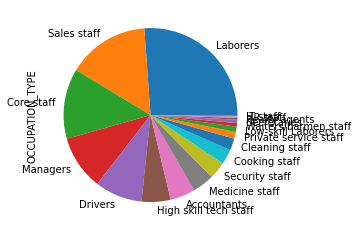

In [47]:
df1.OCCUPATION_TYPE.value_counts(normalize= True).plot.pie()

plt.show()

In [48]:
# imputing null values with "Unknown" as using mode may distort the picture because of presence of large number of null values
df1["OCCUPATION_TYPE"] = df1.OCCUPATION_TYPE.fillna("Unknown")

In [49]:
df1.OCCUPATION_TYPE.isnull().sum()

0

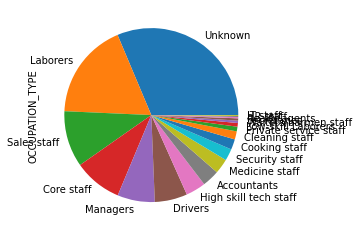

In [50]:
df1.OCCUPATION_TYPE.value_counts(normalize= True).plot.pie()

plt.show()

##### Pie plot can't given clear visibility
##### Plotting.a bar graph for the variable Occupation Type to understand the disctribution by various occupations

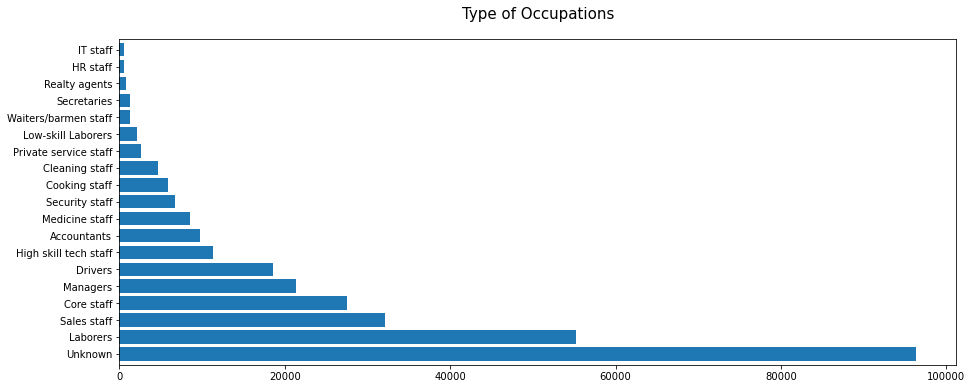

In [51]:
plt.figure(figsize = [15,6])
df1.OCCUPATION_TYPE.value_counts().plot.barh(width = .8)
plt.title("Type of Occupations", fontdict={"fontsize":15}, pad =20)
plt.show()

### CNT_FAM_MEMBERS

##### Checking null value counts for the variable

In [52]:
df1.CNT_FAM_MEMBERS.isna().sum() 

2

In [53]:
#Plotting boxplot for variable

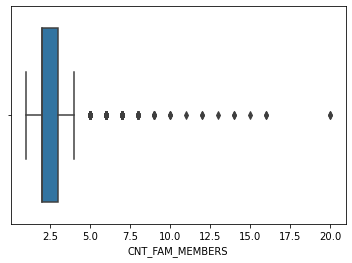

In [54]:

sns.boxplot(df1['CNT_FAM_MEMBERS'])
plt.show()

In [55]:
df1.CNT_FAM_MEMBERS.median()

2.0

impute null values with median

In [56]:
df1['CNT_FAM_MEMBERS'] = df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.median())

In [57]:
#Confirming the imputation
df1.CNT_FAM_MEMBERS.isna().sum() 

0

Finding the statistics for various numerical variables of Credit Bureau about the client

In [58]:
df1[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

##### Made a list of AMT_CREDITT_BUREAU related features

In [59]:
AMT_REQ_CREDIT_CAL = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

Imputing Median value at null values in AMT_CREDITT_BUREAU list 

In [60]:
df1.fillna(df1[AMT_REQ_CREDIT_CAL].median(),inplace = True)

Checking the imputation

In [61]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

#### Checking Null values in FLAG_DOCUMENT features

In [62]:
 df1.FLAG_DOCUMENT_4.isnull().sum()

0

### CNT_SOCIAL_CIRCLE

#### Made a list of CNT_SOCIAL_CIRCLE related features

In [63]:
df1[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

Checking null values 

In [64]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

#### To impute all vlues at once want to make a list

In [65]:
CNT_SOCIAL_CIRCLE = df1[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

Replacing values with Median 

In [66]:
df1.fillna(df1[CNT_SOCIAL_CIRCLE].median(),inplace = True)

Checking imputation of null values

In [67]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [68]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.median()

0.0

### External sources

#### Checking the values variables of external sources

In [69]:
df1[['EXT_SOURCE_2','EXT_SOURCE_3']]

EXT_SOURCE_2  EXT_SOURCE_3
0           0.262949      0.139376
1           0.622246           NaN
2           0.555912      0.729567
3           0.650442           NaN
4           0.322738           NaN
...              ...           ...
307506      0.681632           NaN
307507      0.115992           NaN
307508      0.535722      0.218859
307509      0.514163      0.661024
307510      0.708569      0.113922

[307511 rows x 2 columns]

##### Replacing the missing values with median values for external source variable

EXT_SOURCE_2

In [70]:
df1['EXT_SOURCE_2'] = df1.EXT_SOURCE_2.fillna(df1['EXT_SOURCE_2'].median())

Checking the imputation of values

In [71]:
df1.EXT_SOURCE_2.isnull().sum()

0

EXT_SOURCE_3

In [72]:
df1['EXT_SOURCE_3'] = df1.EXT_SOURCE_3.fillna(df1['EXT_SOURCE_3'].median())

In [73]:
df1.EXT_SOURCE_3.isnull().sum()

0

### Checking the correlation betwen both external sources with Target variable

In [74]:
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]  # putting irrevlent columns in varibale "irrev"

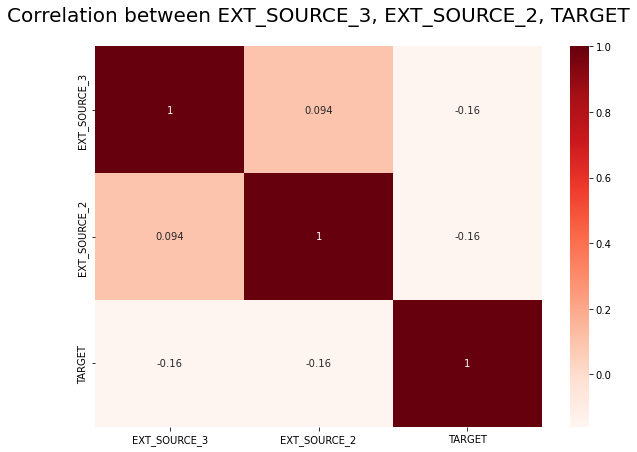

In [75]:
plt.figure(figsize= [10,7])

sns.heatmap(df1[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

## Flag Features

##### Checking flag related features

In [76]:
#Make new variable variable "flag_features" which contains all flag related columns

In [77]:
flag_features = [col for col in df1.columns if "FLAG" in col]
flag_features  

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [78]:
len(flag_features)

28

In [79]:
df1.FLAG_DOCUMENT_12

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: FLAG_DOCUMENT_12, Length: 307511, dtype: int64

##### Making new dataframe which containing all FLAG columns and TARGET column

In [80]:
flag_features_df1 = df1[flag_features+["TARGET"]]

##### Replacing (0) as repayer and (1) as defaulter for TARGET column

In [81]:
flag_features_df1["TARGET"] = flag_features_df1["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

##### As given in column description replacing (1) as (Y) being TRUE and (0) as (N) being False

In [82]:
for i in flag_features_df1:
    if i!= "TARGET":
        flag_features_df1[i] = flag_features_df1[i].replace({1:"Y", 0:"N"})

In [83]:
flag_features_df1.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            N               Y          Y              Y               N   
1            N               N          Y              Y               N   
2            Y               Y          Y              Y               Y   
3            N               Y          Y              Y               N   
4            N               Y          Y              Y               N   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  ...  \
0                Y          Y          N               N               Y  ...   
1                Y          Y          N               N               Y  ...   
2                Y          Y          N               N               N  ...   
3                Y          N          N               N               Y  ...   
4                Y          N          N               N               N  ...   

  FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_21     TARGET  
0                N  Defaulter  
1                N    Repayer  
2                N    Repayer  
3                N    Repayer  
4                N    Repayer  

[5 rows x 29 columns]

##### using itertools  plotting subplots

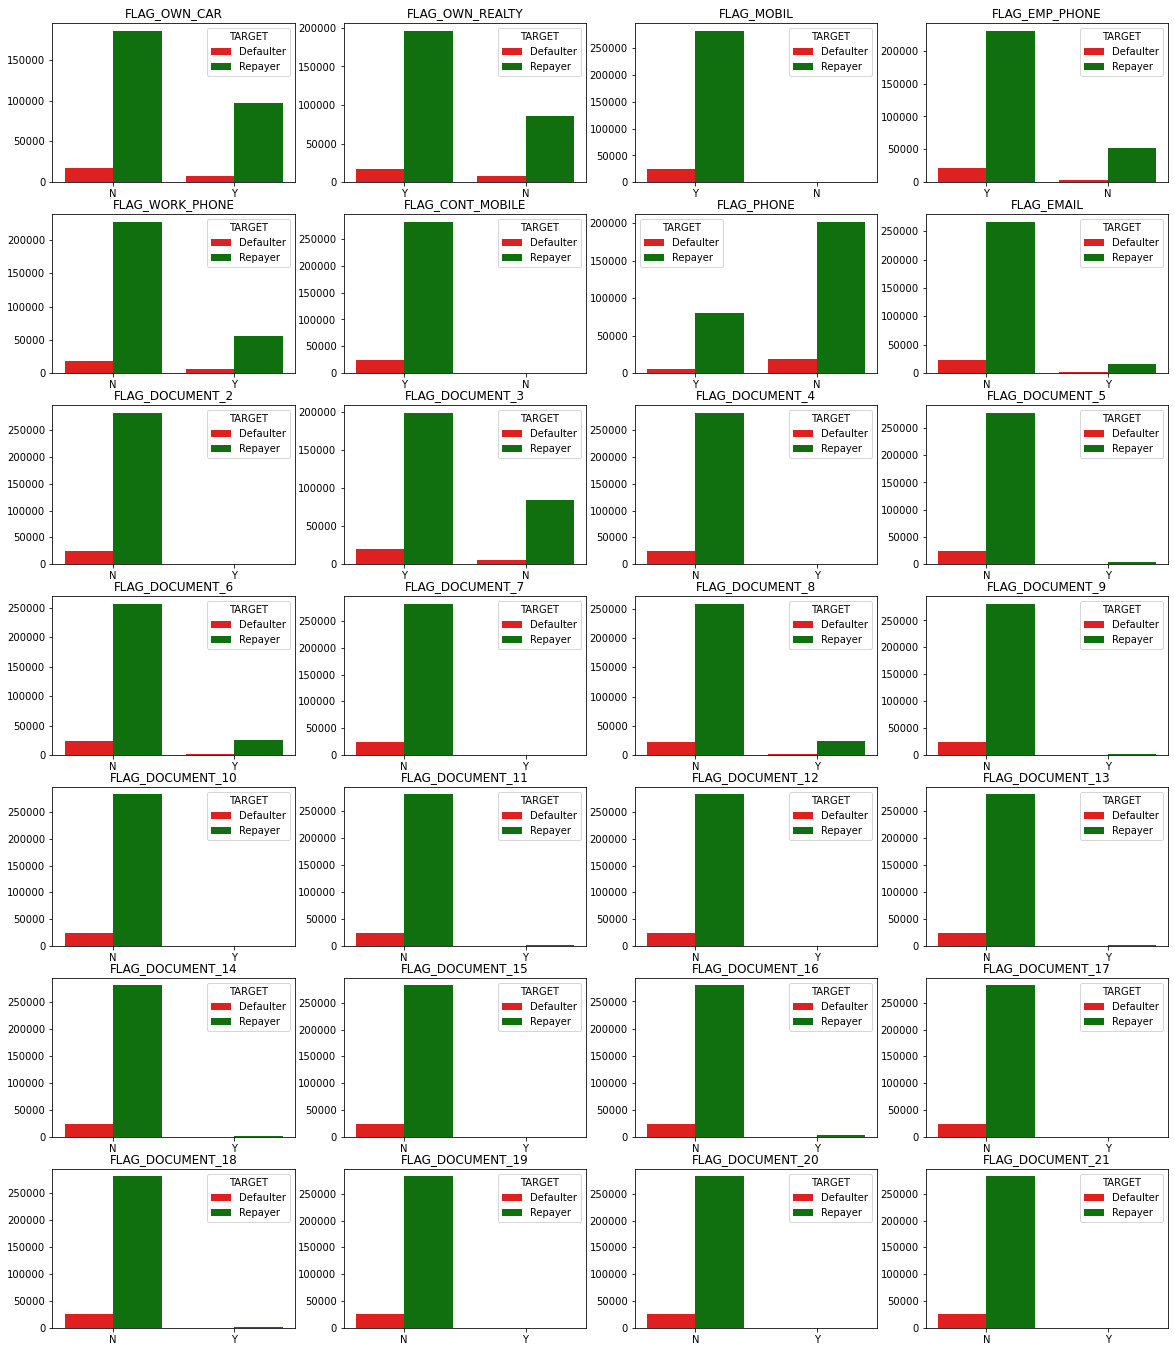

In [84]:
import itertools 

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_features,range(len(flag_features))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_features_df1[i], hue = flag_features_df1["TARGET"], palette = ["r","g"])
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

From this it is clearly seen that [FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3] This features having more repayers than defaulters.
From these keeping above featuresprovide important analysis and remove all other FLAG columns for furhter analysis.

In [85]:
flag_features_df1.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [86]:
len(flag_features_df1.columns)

25

##### Dropping the other Flag Features which gives not important data

In [87]:
df1.drop(flag_features_df1.columns, axis=1, inplace= True)

In [88]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      1.0                      0.0   
2  ...                      0.0                      0.0   
3  ...                      2.0                      0.0   
4  ...                      0.0                      0.0   

  DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                -1134.0               1                        0.0   
1                 -828.0               1                        0.0   
2                 -815.0               0                        0.0   
3                 -617.0               1                        0.0   
4                -1106.0               0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0  

[5 rows x 48 columns]

Checking the shape of dataset

In [89]:
df1.shape

(307511, 48)

### DAYS_LAST_PHONE_CHANGE

Describe variable

In [90]:
df1.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [91]:
#The counts for various values of the variable
df1.DAYS_LAST_PHONE_CHANGE.value_counts(normalize=True)

 0.0       0.122507
-1.0       0.009144
-2.0       0.007538
-3.0       0.005733
-4.0       0.004179
             ...   
-4051.0    0.000003
-3593.0    0.000003
-3622.0    0.000003
-3570.0    0.000003
-3538.0    0.000003
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: float64

In [92]:
#Replacing the missing values with 0 as it is occured most times

In [93]:
df1['DAYS_LAST_PHONE_CHANGE'] = df1.DAYS_LAST_PHONE_CHANGE.fillna(0)

In [94]:
df1.DAYS_LAST_PHONE_CHANGE

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

##### Making "days_feature" varibale to store all days columns

In [95]:
days_feature = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
df1[days_feature].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean              -962.855657  
std                826.808966  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

As seen that there are lot of negative values

By using Abs function Convert negative values to positive

In [96]:
df1[days_feature]= abs(df1[days_feature])

#####  Describe

In [97]:
df1[days_feature].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.855657  
std                826.808966  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

## Finally checking the null values in the features

In [98]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION  

In [99]:
df1.shape

(307511, 48)

## Standardizing values

In [100]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868   16036.995067   67724.742149  ...   
std                      0.013831    4363.988632  139443.751806  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307511.000000    307511.000000               307511.000000   
mean               962.855657         0.710023                    0.005538   
std                826.808966         0.453752                    0.078014   
min                  0.000000         0.000000                    0.000000   
25%                274.000000         0.000000                    0.000000   
50%                757.000000         1.000000                    0.000000   
75%               1570.000000         1.000000                    0.000000   
max               4292.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%     

##### columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.

##### Making the Bins of  Numerical Columns to create a categorical column

#### Making bins for income amount in  Lacs

In [101]:
df1['AMT_INCOME_TOTAL']=df1['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [102]:
round((df1["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [103]:
df1['AMT_GOODS_PRICE']=df1['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df1['AMT_GOODS_PRICE_RANGE']=pd.cut(df1['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [104]:
round((df1["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        20.41
4L-5L        18.62
6L-7L        13.02
10L Above    11.10
1L-2L        10.72
8L-9L         6.99
3L-4L         6.90
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.52
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

##### Converting to lakhs upto 2 decimal places

In [215]:
df1['AMT_INCOME_TOTAL_in_lakhs'] = round(df1['AMT_INCOME_TOTAL']/100000,2)

In [216]:
df1['AMT_CREDIT_in_lakhs'] = round(df1['AMT_CREDIT']/100000,2)

#### Creating buckets


In [217]:
df1['AMT_CREDIT_in_lakhs_Range'] = pd.cut(df1['AMT_CREDIT_in_lakhs'],bins = [0,5,10,15,20,25,30,35,40,45], labels = ['0-5L','5-10L','10-15L','15-20L','20-25L','25-30L','30-35L','35-40L','Above 40L'])

#### Checking the buckets formation

In [219]:
df1[['AMT_CREDIT_in_lakhs','AMT_INCOME_TOTAL_in_lakhs','AMT_CREDIT_in_lakhs_Range','AMT_CREDIT_in_lakhs']]

AMT_CREDIT_in_lakhs  AMT_INCOME_TOTAL_in_lakhs  \
0                      4.07                        0.0   
1                     12.94                        0.0   
2                      1.35                        0.0   
3                      3.13                        0.0   
4                      5.13                        0.0   
...                     ...                        ...   
307506                 2.55                        0.0   
307507                 2.70                        0.0   
307508                 6.78                        0.0   
307509                 3.70                        0.0   
307510                 6.75                        0.0   

       AMT_CREDIT_in_lakhs_Range  AMT_CREDIT_in_lakhs  
0                           0-5L                 4.07  
1                         10-15L                12.94  
2                           0-5L                 1.35  
3                           0-5L                 3.13  
4                          5-10L                 5.13  
...                          ...                  ...  
307506                      0-5L                 2.55  
307507                      0-5L                 2.70  
307508                     5-10L                 6.78  
307509                      0-5L                 3.70  
307510                     5-10L                 6.75  

[307511 rows x 4 columns]

### AMT_INCOME_TOTAL

##### Creating buckets

In [220]:
df1['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df1['AMT_INCOME_TOTAL_in_lakhs'],bins = [0,1,2,3,4,5,6,7,8,9,10,100], labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

##### Checking the buckets formation

In [221]:
df1[['AMT_INCOME_TOTAL_RANGE','AMT_INCOME_TOTAL']]

AMT_INCOME_TOTAL_RANGE  AMT_INCOME_TOTAL
0                         NaN             2.025
1                         NaN             2.700
2                         NaN             0.675
3                         NaN             1.350
4                         NaN             1.215
...                       ...               ...
307506                    NaN             1.575
307507                    NaN             0.720
307508                    NaN             1.530
307509                    NaN             1.710
307510                    NaN             1.575

[307511 rows x 2 columns]

##### `Checking the count of values

In [223]:
df1[['AMT_INCOME_TOTAL_RANGE','AMT_INCOME_TOTAL_in_lakhs']].value_counts()

AMT_INCOME_TOTAL_RANGE  AMT_INCOME_TOTAL_in_lakhs
0-1L                    0.01                         1
dtype: int64

### convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning

In [105]:
df1["AGE"] = df1["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

df1["AGE_GROUP"] = pd.cut(df1["AGE"], bins=bins, labels=slots)

In [106]:
df1["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

#### DAYS_EMPLOYED
creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

In [107]:
df1["YEARS_EMPLOYED"] = df1["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

df1["EMPLOYEMENT_YEARS"] = pd.cut(df1["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [108]:
df1["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

#### Converting Days to Years

In [187]:
df1[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", 
                "DAYS_LAST_PHONE_CHANGE"]] = abs(df1[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", 
                                                                 "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]])

In [188]:
df1[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.855657  
std                826.808966  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

##### Rounding days to 2 Decimals

In [190]:
df1['AGE_IN_YEARS'] = round(df1['DAYS_BIRTH']/365,2)

In [191]:
df1['AGE_IN_YEARS']

0         25.92
1         45.93
2         52.18
3         52.07
4         54.61
          ...  
307506    25.55
307507    56.92
307508    41.00
307509    32.77
307510    46.18
Name: AGE_IN_YEARS, Length: 307511, dtype: float64

##### Making buckets of 5 Years

In [193]:
df1['AGE_IN_YEARS_RANGE'] = pd.cut(df1['AGE_IN_YEARS'],bins=[0,20,25,30,35,40,45,50,55,60,65,70],labels=["0-20",'20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','above 65'])

In [195]:
df1[['AGE_IN_YEARS_RANGE','AGE_IN_YEARS']]

AGE_IN_YEARS_RANGE  AGE_IN_YEARS
0                   25-30         25.92
1                   45-50         45.93
2                   50-55         52.18
3                   50-55         52.07
4                   50-55         54.61
...                   ...           ...
307506              25-30         25.55
307507              55-60         56.92
307508              40-45         41.00
307509              30-35         32.77
307510              45-50         46.18

[307511 rows x 2 columns]

#### Employment years

In [199]:
df1['EMPLOYMENT_YEARS'] = round(df1['DAYS_EMPLOYED']/365,2)

In [200]:
# Creating a Bucket for Employment years

In [201]:
df1['EMPLOYMENT_YEARS_RANGE'] = pd.cut(df1['EMPLOYMENT_YEARS'],bins=[0,5,10,15,20,25,30,35,40,45,50,55],labels=["0-5",'5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','above 50'])

In [202]:
df1[['EMPLOYMENT_YEARS_RANGE','EMPLOYMENT_YEARS']]

EMPLOYMENT_YEARS_RANGE  EMPLOYMENT_YEARS
0                         0-5              1.75
1                         0-5              3.25
2                         0-5              0.62
3                        5-10              8.33
4                        5-10              8.32
...                       ...               ...
307506                    0-5              0.65
307507                    NaN           1000.67
307508                  20-25             21.70
307509                  10-15             13.11
307510                    0-5              3.46

[307511 rows x 2 columns]

In [ ]:
#Converting to lakhs upto 2 decimal places
df_application['AMT_INCOME_TOTAL_in_lakhs'] = round(df_application['AMT_INCOME_TOTAL']/100000,2)

#### Making a categorical features list

In [330]:


categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    df1[col] = pd.Categorical(df1[col])

## Open the Data: previous_Application.csv

In [109]:
sr = pd.read_csv("previous_application.csv")

In [110]:
sr.head(20)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
1      2802425      108129         Cash loans    25188.615         607500.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
3      2819243      176158         Cash loans    47041.335         450000.0   
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
10     1715995      447712         Cash loans    11368.620         270000.0   
11     2257824      161140         Cash loans    13832.775         211500.0   
12     2330894      258628         Cash loans    12165.210         148500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   
16     2163253      154602     Consumer loans     4187.340          26955.0   
17     1285768      142748    Revolving loans     9000.000         180000.0   
18     2393109      396305         Cash loans    10181.700         180000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   

    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0      17145.0               0.0          17145.0                   SATURDAY   
1     679671.0               NaN         607500.0                   THURSDAY   
2     136444.5               NaN         112500.0                    TUESDAY   
3     470790.0               NaN         450000.0                     MONDAY   
4     404055.0               NaN         337500.0                   THURSDAY   
5     340573.5               NaN         315000.0                   SATURDAY   
6          0.0               NaN              NaN                    TUESDAY   
7          0.0               NaN              NaN                     MONDAY   
8          0.0               NaN              NaN                     MONDAY   
9          0.0               NaN              NaN                   SATURDAY   
10    335754.0               NaN         270000.0                     FRIDAY   
11    246397.5               NaN         211500.0                     FRIDAY   
12    174361.5               NaN         148500.0                    TUESDAY   
13     57564.0               0.0          53779.5                     SUNDAY   
14     27252.0               0.0          26550.0                   SATURDAY   
15    119853.0           12649.5         126490.5                    TUESDAY   
16     27297.0            1350.0          26955.0                   SATURDAY   
17    180000.0               NaN         180000.0                     FRIDAY   
18    180000.0               NaN         180000.0                   THURSDAY   
19     49455.0               NaN          45000.0                   SATURDAY   

    HOUR_APPR_PROCESS_START  ...  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                        15  ...          Connectivity         12.0   
1                        11  ...                   XNA         36.0   
2                        11  ...                   XNA         12.0   
3                         7  ...                   XNA         12.0   
4                         9  ...                   XNA         24.0   
5                         8  ...                   XNA         18.0   
6                        11  ...                   XNA          NaN   
7                         7  ...                   XNA          NaN   
8                       

In [111]:
sr.shape

(1670214, 37)

#### Checking the null values

In [112]:
sr.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [113]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Describe

In [114]:
sr.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [115]:
def Missing_Values(dataframe):
    return round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending = False),3)

In [116]:
Missing_Values(sr)

RATE_INTEREST_PRIVILEGED       99.644
RATE_INTEREST_PRIMARY          99.644
AMT_DOWN_PAYMENT               53.636
RATE_DOWN_PAYMENT              53.636
NAME_TYPE_SUITE                49.120
NFLAG_INSURED_ON_APPROVAL      40.298
DAYS_TERMINATION               40.298
DAYS_LAST_DUE                  40.298
DAYS_LAST_DUE_1ST_VERSION      40.298
DAYS_FIRST_DUE                 40.298
DAYS_FIRST_DRAWING             40.298
AMT_GOODS_PRICE                23.082
AMT_ANNUITY                    22.287
CNT_PAYMENT                    22.286
PRODUCT_COMBINATION             0.021
AMT_CREDIT                      0.000
NAME_YIELD_GROUP                0.000
NAME_PORTFOLIO                  0.000
NAME_SELLER_INDUSTRY            0.000
SELLERPLACE_AREA                0.000
CHANNEL_TYPE                    0.000
NAME_PRODUCT_TYPE               0.000
SK_ID_PREV                      0.000
NAME_GOODS_CATEGORY             0.000
NAME_CLIENT_TYPE                0.000
CODE_REJECT_REASON              0.000
SK_ID_CURR  

### Checking the features has missing value more than 50%

In [117]:
print(Missing_Values(sr)[Missing_Values(sr) > 50])

RATE_INTEREST_PRIVILEGED    99.644
RATE_INTEREST_PRIMARY       99.644
AMT_DOWN_PAYMENT            53.636
RATE_DOWN_PAYMENT           53.636
dtype: float64


In [118]:
missing_values50 = Missing_Values(sr)[Missing_Values(sr) > 50]

In [119]:
len(missing_values50)

4

##### Deleting the columns with null values >50%

In [120]:
sr.drop(columns = missing_values50.index, inplace = True)

In [121]:
sr.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 33 columns]

### Checking the features has missing value more than 15%

In [122]:
missing_values15 = Missing_Values(sr)[Missing_Values(sr)>15]

In [123]:
missing_values15

NAME_TYPE_SUITE              49.120
DAYS_FIRST_DRAWING           40.298
DAYS_TERMINATION             40.298
DAYS_LAST_DUE                40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_FIRST_DUE               40.298
NFLAG_INSURED_ON_APPROVAL    40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
dtype: float64

In [124]:
sr[missing_values15.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
0                    NaN            365243.0             -37.0          -42.0   
1          Unaccompanied            365243.0          365243.0       365243.0   
2        Spouse, partner            365243.0          365243.0       365243.0   
3                    NaN            365243.0            -177.0         -182.0   
4                    NaN                 NaN               NaN            NaN   
...                  ...                 ...               ...            ...   
1670209              NaN            365243.0            -351.0         -358.0   
1670210    Unaccompanied            365243.0           -1297.0        -1304.0   
1670211  Spouse, partner            365243.0           -1181.0        -1187.0   
1670212           Family            365243.0            -817.0         -825.0   
1670213           Family            365243.0            -423.0         -443.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
0                            300.0           -42.0                        0.0   
1                            916.0          -134.0                        1.0   
2                             59.0          -271.0                        1.0   
3                           -152.0          -482.0                        1.0   
4                              NaN             NaN                        NaN   
...                            ...             ...                        ...   
1670209                      362.0          -508.0                        0.0   
1670210                    -1274.0         -1604.0                        0.0   
1670211                    -1187.0         -1457.0                        0.0   
1670212                     -825.0         -1155.0                        1.0   
1670213                      247.0         -1163.0                        0.0   

         AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  
0                17145.0     1730.430         12.0  
1               607500.0    25188.615         36.0  
2               112500.0    15060.735         12.0  
3               450000.0    47041.335         12.0  
4               337500.0    31924.395         24.0  
...                  ...          ...          ...  
1670209         267295.5    14704.290         30.0  
1670210          87750.0     6622.020         12.0  
1670211         105237.0    11520.855         10.0  
1670212         180000.0    18821.520         12.0  
1670213         360000.0    16431.300         48.0  

[1670214 rows x 10 columns]

#### Checking Features of sr dataset

In [125]:
sr.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [126]:
# Listing down columns which are not needed
notuse = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

sr.drop(notuse,axis =1, inplace = True)

sr.shape

(1670214, 29)

### NAME_TYPE_SUITE

In [127]:
# IMputing values "Unknown" as this a categorical column
sr["NAME_TYPE_SUITE"] = sr["NAME_TYPE_SUITE"].fillna("Unknown")

Missing_Values(sr)

NFLAG_INSURED_ON_APPROVAL    40.298
DAYS_TERMINATION             40.298
DAYS_LAST_DUE                40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_FIRST_DUE               40.298
DAYS_FIRST_DRAWING           40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
PRODUCT_COMBINATION           0.021
AMT_CREDIT                    0.000
NAME_PRODUCT_TYPE             0.000
NAME_YIELD_GROUP              0.000
NAME_SELLER_INDUSTRY          0.000
SELLERPLACE_AREA              0.000
CHANNEL_TYPE                  0.000
SK_ID_PREV                    0.000
NAME_PORTFOLIO                0.000
SK_ID_CURR                    0.000
NAME_CLIENT_TYPE              0.000
NAME_TYPE_SUITE               0.000
CODE_REJECT_REASON            0.000
NAME_PAYMENT_TYPE             0.000
DAYS_DECISION                 0.000
NAME_CONTRACT_STATUS          0.000
NAME_CASH_LOAN_PURPOSE        0.000
AMT_APPLICATION               0.000
NAME_CONTRACT_TYPE          

#### There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are

##### Describe

In [128]:
sr[missing_values15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
count       997149.000000     997149.000000  997149.000000   
mean        342209.855039      81992.343838   76582.403064   
std          88916.115834     153303.516729  149647.415123   
min          -2922.000000      -2874.000000   -2889.000000   
25%         365243.000000      -1270.000000   -1314.000000   
50%         365243.000000       -499.000000    -537.000000   
75%         365243.000000        -44.000000     -74.000000   
max         365243.000000     365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
count              997149.000000   997149.000000              997149.000000   
mean                33767.774054    13826.269337                   0.332570   
std                106857.034789    72444.869708                   0.471134   
min                 -2801.000000    -2892.000000                   0.000000   
25%                 -1242.000000    -1628.000000                   0.000000   
50%                  -361.000000     -831.000000                   0.000000   
75%                   129.000000     -411.000000                   1.000000   
max                365243.000000   365243.000000                   1.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

#### Creating new column for days
 Analyzing the days feature 

In [129]:
p_days_sr = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
sr[p_days_sr].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count   1.670214e+06       997149.000000   997149.000000   
mean   -8.806797e+02       342209.855039    13826.269337   
std     7.790997e+02        88916.115834    72444.869708   
min    -2.922000e+03        -2922.000000    -2892.000000   
25%    -1.300000e+03       365243.000000    -1628.000000   
50%    -5.810000e+02       365243.000000     -831.000000   
75%    -2.800000e+02       365243.000000     -411.000000   
max    -1.000000e+00       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                33767.774054   76582.403064      81992.343838  
std                106857.034789  149647.415123     153303.516729  
min                 -2801.000000   -2889.000000      -2874.000000  
25%                 -1242.000000   -1314.000000      -1270.000000  
50%                  -361.000000    -537.000000       -499.000000  
75%                   129.000000     -74.000000        -44.000000  
max                365243.000000  365243.000000     365243.000000

#### Analyzing that the days are appear in Negative
#### It should be converted to positive

In [130]:
sr[p_days_sr] = abs(sr[p_days_sr])
sr[missing_values15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
count       997149.000000     997149.000000  997149.000000   
mean        342340.056543      83505.775017   78152.730207   
std          88413.495220     152484.418802  148833.342466   
min              2.000000          2.000000       2.000000   
25%         365243.000000        447.000000     455.000000   
50%         365243.000000       1171.000000    1155.000000   
75%         365243.000000       2501.000000    2418.000000   
max         365243.000000     365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
count              997149.000000   997149.000000              997149.000000   
mean                35163.363265    15949.224065                   0.332570   
std                106405.950190    72007.270877                   0.471134   
min                     0.000000        2.000000                   0.000000   
25%                   257.000000      475.000000                   0.000000   
50%                   741.000000      921.000000                   0.000000   
75%                  1735.000000     1825.000000                   1.000000   
max                365243.000000   365243.000000                   1.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

### days group calculation

In [131]:
#days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
sr['YEARLY_DECISION'] = pd.cut(sr['DAYS_DECISION'],bins,labels=slots)

In [132]:
sr['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

### From above Ratio it seems that 35% applicants taken loan within year

#### Finding unique values

In [133]:
sr.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [134]:
Missing_Values(sr)

NFLAG_INSURED_ON_APPROVAL    40.298
DAYS_TERMINATION             40.298
DAYS_LAST_DUE                40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_FIRST_DUE               40.298
DAYS_FIRST_DRAWING           40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
PRODUCT_COMBINATION           0.021
AMT_CREDIT                    0.000
SK_ID_PREV                    0.000
CHANNEL_TYPE                  0.000
NAME_YIELD_GROUP              0.000
NAME_SELLER_INDUSTRY          0.000
SELLERPLACE_AREA              0.000
NAME_PORTFOLIO                0.000
NAME_PRODUCT_TYPE             0.000
SK_ID_CURR                    0.000
NAME_GOODS_CATEGORY           0.000
NAME_CLIENT_TYPE              0.000
NAME_TYPE_SUITE               0.000
CODE_REJECT_REASON            0.000
NAME_PAYMENT_TYPE             0.000
DAYS_DECISION                 0.000
NAME_CONTRACT_STATUS          0.000
NAME_CASH_LOAN_PURPOSE        0.000
AMT_APPLICATION             

###  AMT_GOODS_PRICE & AMT_ANNUITY

##### Now imputing all Missing values of AMT_GOODS_PRICE & AMT_ANNUITY

plotting distribution of "AMT_ANNUITY"

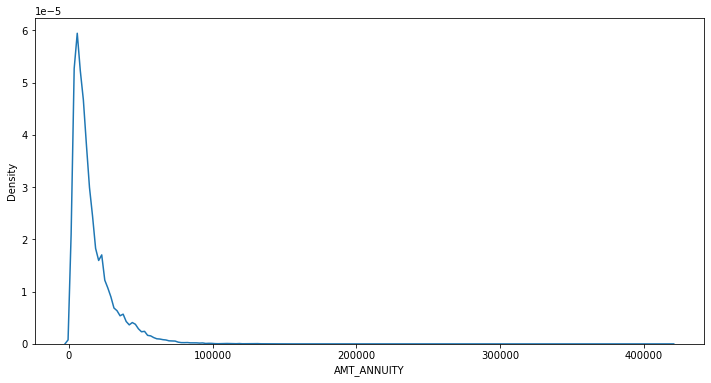

In [135]:
plt.figure(figsize=(12,6))
sns.kdeplot(sr['AMT_ANNUITY'])
plt.show()

#### There is seen that spike in plot and Outliers at its right side
#### So it may impute the missing values with Median due to Outliers

In [136]:
sr['AMT_ANNUITY'].fillna(sr['AMT_ANNUITY'].median(),inplace = True)

##### Confirming the imputation operation

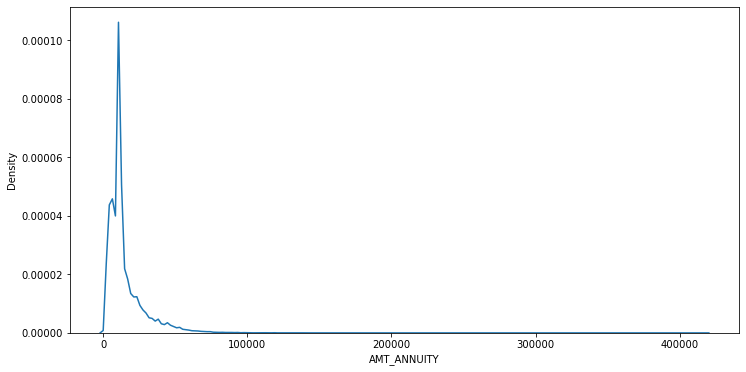

In [137]:
plt.figure(figsize=(12,6))
sns.kdeplot(sr['AMT_ANNUITY'])
plt.show()

###  AMT_GOODS_PRICE 

##### plotting distribution of "AMT_GOODS_PRICE" 

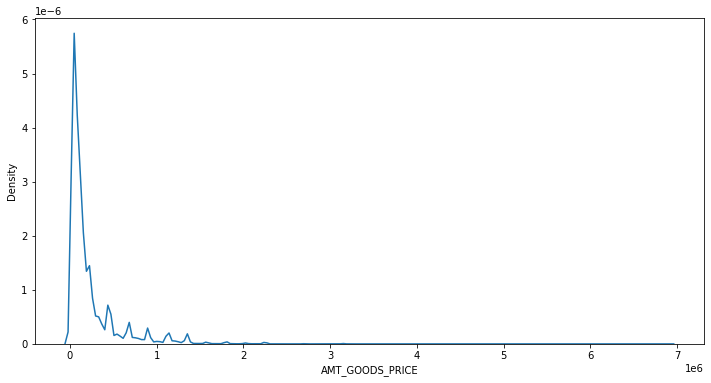

In [138]:
plt.figure(figsize=(12,6))
sns.kdeplot(sr['AMT_GOODS_PRICE'])
plt.show()

#### There are seen lot of spikes in the plot so to confirm we have to use all Mean, Mode & Median

#### Making new dataframe for "AMT_GOODS_PRICE" with Mean, Mode & Median imputation

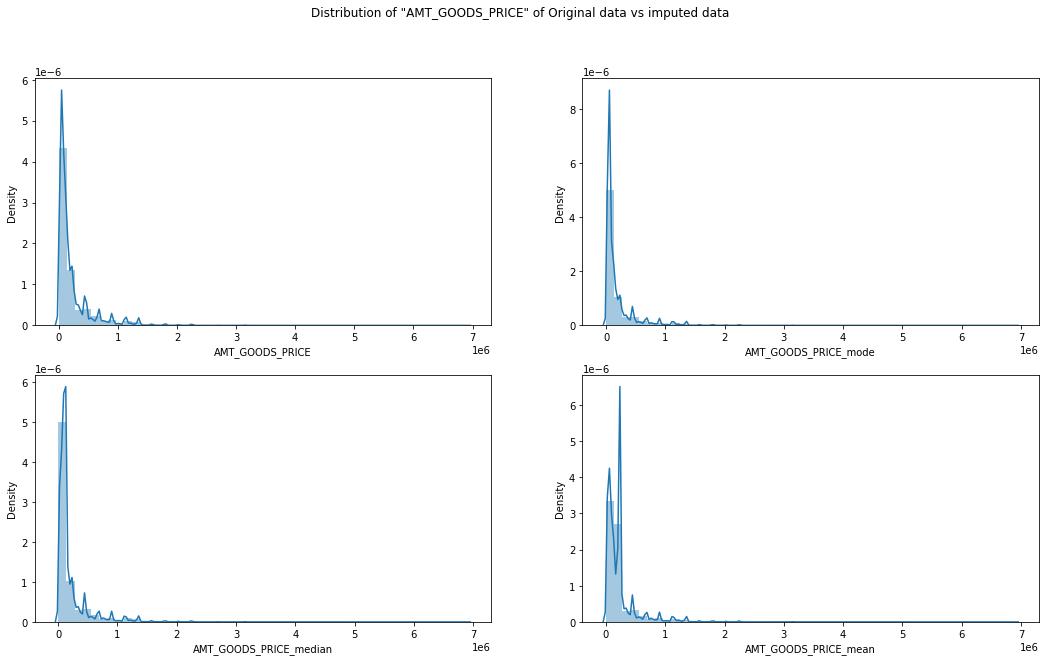

In [139]:
all_sr = pd.DataFrame() 
all_sr['AMT_GOODS_PRICE_mode'] = sr['AMT_GOODS_PRICE'].fillna(sr['AMT_GOODS_PRICE'].mode()[0])
all_sr['AMT_GOODS_PRICE_median'] = sr['AMT_GOODS_PRICE'].fillna(sr['AMT_GOODS_PRICE'].median())
all_sr['AMT_GOODS_PRICE_mean'] = sr['AMT_GOODS_PRICE'].fillna(sr['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of "AMT_GOODS_PRICE" of Original data vs imputed data')
plt.subplot(221)
sns.distplot(sr['AMT_GOODS_PRICE'][pd.notnull(sr['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(all_sr[i[1]])

#### So from above plot it seems that Mode plot appears quite similar to Original one 
#### So imputing missing  values with Mode

In [140]:
sr['AMT_GOODS_PRICE'].fillna(sr['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [142]:
sr['AMT_GOODS_PRICE']

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_GOODS_PRICE, Length: 1670214, dtype: float64

#### Creating Buckets

In [278]:
sr['AMT_CREDIT_LAKHS_Range']=pd.cut(df1['AMT_INCOME_TOTAL_in_lakhs'],
                                                         bins = [0,1,2,3,4,5,6,7,8,9,10,100],
                                                         labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

In [279]:
sr['AMT_APPLICATION_LAKHS_Range'] = pd.cut(df1['AMT_INCOME_TOTAL_in_lakhs'],
                                                         bins = [0,1,2,3,4,5,6,7,8,9,10,100],
                                                         labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

In [280]:
sr.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION  ... DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  \
0             73  ...                     300.0          42.0   
1            164  ...                     916.0      365243.0   
2            301  ...                      59.0      365243.0   
3            512  ...                     152.0         182.0   
4            781  ...                       NaN           NaN   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL YEARLY_DECISION  \
0             37.0                       0.0               1   
1         365243.0                       1.0               1   
2         365243.0                       1.0               1   
3            177.0                       1.0               2   
4              NaN                       NaN               3   

  AMT_ANNUITY_LAKHS AMT_APPLICATION_LAKHS AMT_CREDIT_LAKHS  \
0          0.017304               0.17145         0.171450   
1          0.251886               6.07500         6.796710   
2          0.150607               1.12500         1.364445   
3          0.470413               4.50000         4.707900   
4          0.319244               3.37500         4.040550   

   AMT_APPLICATION_LAKHS_Range AMT_CREDIT_LAKHS_Range  
0                          NaN                    NaN  
1                          NaN                    NaN  
2                          NaN                    NaN  
3                          NaN                    NaN  
4                          NaN                    NaN  

[5 rows x 35 columns]

##### Checking the null values

In [143]:
sr.AMT_GOODS_PRICE.isnull().sum()

0

### NAME_CONTRACT_STATUS

##### Checking the value Counts

In [146]:
sr.loc[sr['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()


Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

#### From this seen that most of applicantcanceled loan application

#### So imputing null values with 0 is better for analysis

In [147]:
sr['CNT_PAYMENT'].fillna(0,inplace = True)


##### Checking the imputation

In [149]:
sr['CNT_PAYMENT'].isnull().sum()

0

#### Checking the remaining columns in daraset

In [150]:
sr.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'],
      dtype='object')

In [151]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  object  
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object  
 8   NAME_CONTRACT_STATUS       1670214 non-null  object  
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  object  
 11  CODE_REJECT_REASON         1670214 non-null  object  
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

#### Converting required categoical columns from Object to categorical data

In [152]:
cat_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in cat_col:
    sr[col] =pd.Categorical(sr[col])

In [153]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  category
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  category
 8   NAME_CONTRACT_STATUS       1670214 non-null  category
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  category
 11  CODE_REJECT_REASON         1670214 non-null  category
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

#### Descibe

In [154]:
sr.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342340.056543    15949.224065   
std    1.447588e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    0.000000e+00       365243.000000      475.000000   
50%    1.000000e+01       365243.000000      921.000000   
75%    1.600000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

#### There be seen that some features having more difference between Max value and 75% 

In [ ]:
So Review outliers By making new variable for that features

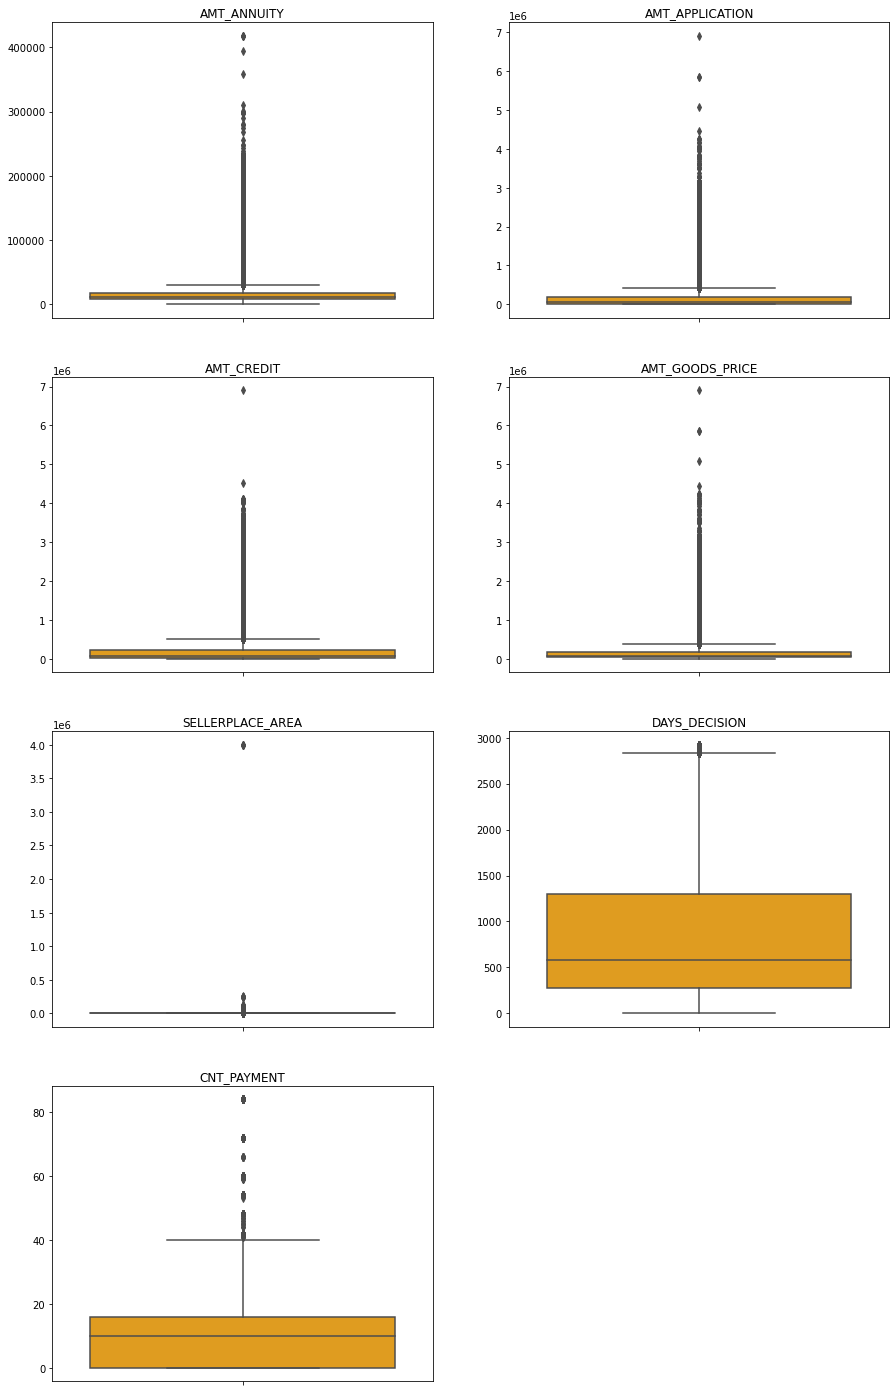

In [155]:
outl_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outl_col, range(len(outl_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = sr[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### It is seen that AMT Features having high Outliers and CNT & Days Features minimal outliers

## Imbalance of Data

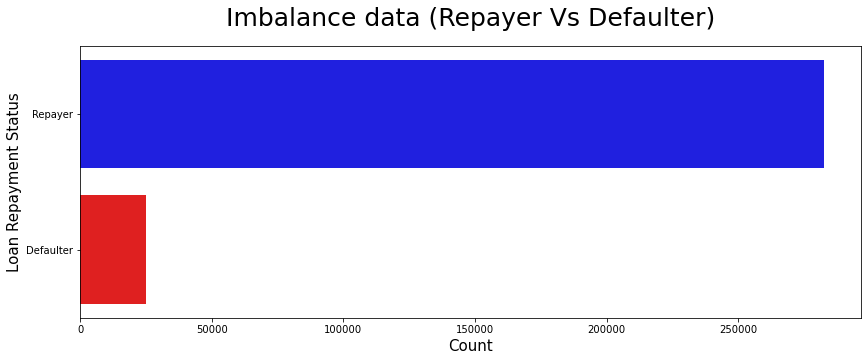

In [174]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = df1["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance data (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

##### Find Numerical % of applicants are Repayers & Defaulters

In [175]:
repayer = round((df1["TARGET"].value_counts()[0]/len(df)* 100),2)
print("Repayer Percentage is {}%".format(repayer))

Repayer Percentage is 91.93%


In [176]:
defaluter = round((df1["TARGET"].value_counts()[1]/len(df)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))

Defaulter Percentage is 8.07%


In [166]:
print("Imbalance Ratio of Repayer and Defaulter is: {0:.2f}/1 (approx)".format(repayer/defaluter))

Imbalance Ratio of Repayer and Defaulter is: 11.39/1 (approx)


## Data  Analysis/Visualization

### Univariate Analysis

#### First taking "application_data_csv" as df

In [177]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0             2.025    406597.5      24700.5            3.510   
1             0             2.700   1293502.5      35698.5           11.295   
2             0             0.675    135000.0       6750.0            1.350   
3             0             1.350    312682.5      29686.5            2.970   
4             0             1.215    513000.0      21865.5            5.130   

   ... AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  ...                        0.0                       0.0   
1  ...                        0.0                       0.0   
2  ...                        0.0                       0.0   
3  ...                        0.0                       0.0   
4  ...                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  \
0                       0.0                        1.0            2L-3L   
1                       0.0                        0.0            2L-3L   
2                       0.0                        0.0             0-1L   
3                       0.0                        1.0            1L-2L   
4                       0.0                        0.0            1L-2L   

   AMT_GOODS_PRICE_RANGE        AGE  AGE_GROUP  YEARS_EMPLOYED  \
0                  3L-4L  25.920548      25-30        1.745205   
1              10L Above  45.931507      45-50        3.254795   
2                  1L-2L  52.180822      50-55        0.616438   
3                  2L-3L  52.068493      50-55        8.326027   
4                  5L-6L  54.608219      50-55        8.323288   

   EMPLOYEMENT_YEARS  
0                0-5  
1                0-5  
2                0-5  
3               5-10  
4               5-10  

[5 rows x 54 columns]

##### Creating variable for Continuous & Categorical features

In [254]:
Num_f = ['AMT_ANNUITY','AMT_GOODS_PRICE','AGE_IN_YEARS','EMPLOYMENT_YEARS',  'AMT_CREDIT_in_lakhs','CNT_FAM_MEMBERS']

In [261]:
Cat_f = ['FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','AGE_IN_YEARS_RANGE','EMPLOYMENT_YEARS_RANGE','AMT_CREDIT_in_lakhs_Range','AMT_INCOME_TOTAL_RANGE']

In [262]:
def Num_A(dataframe, column):
    sns.set(style='whitegrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

In [267]:
def Cat_A(dataframe, column):
    sns.set(style='whitegrid')
    plt.figure(figsize = [12,5])
    dataframe[column].value_counts().plot.barh(width = 0.8)
    plt.title(column)
    plt.show()

#### Plotting for Continuous Features

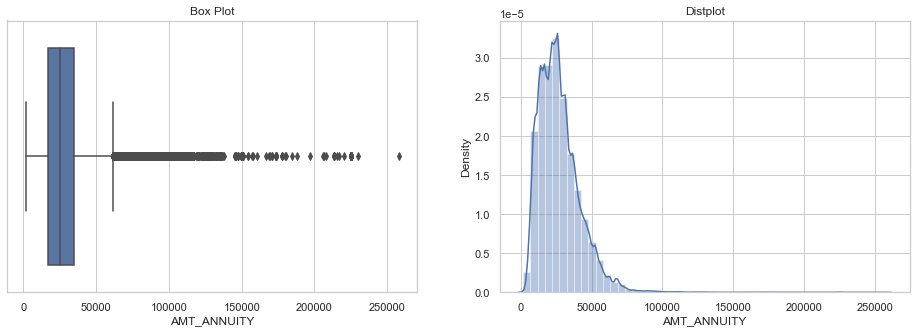

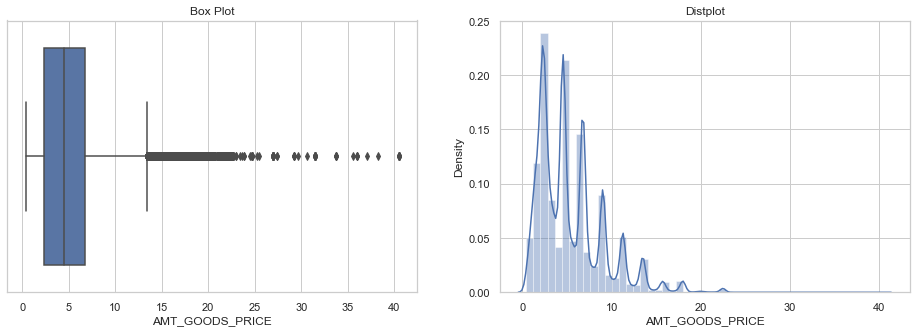

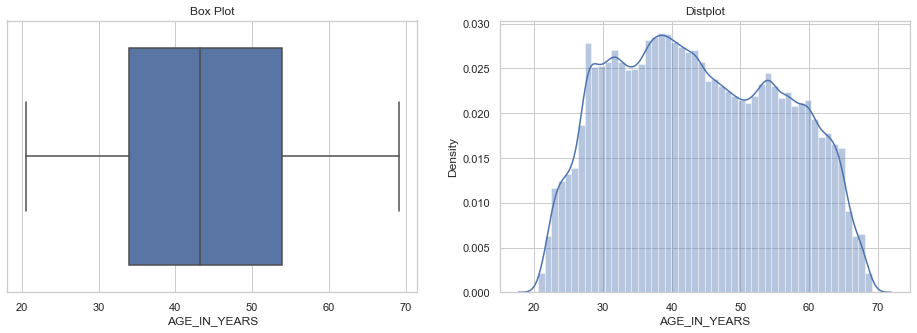

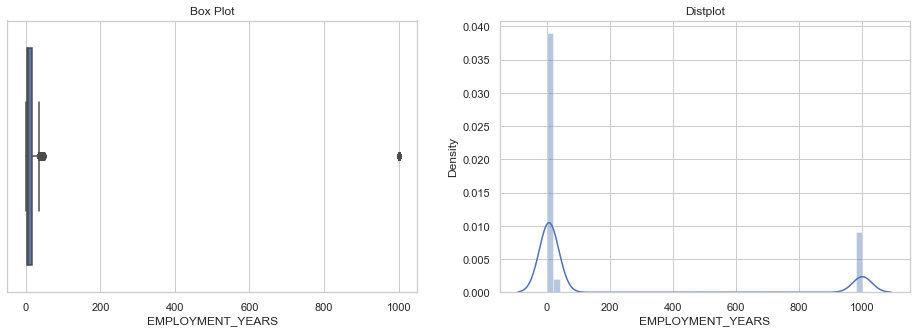

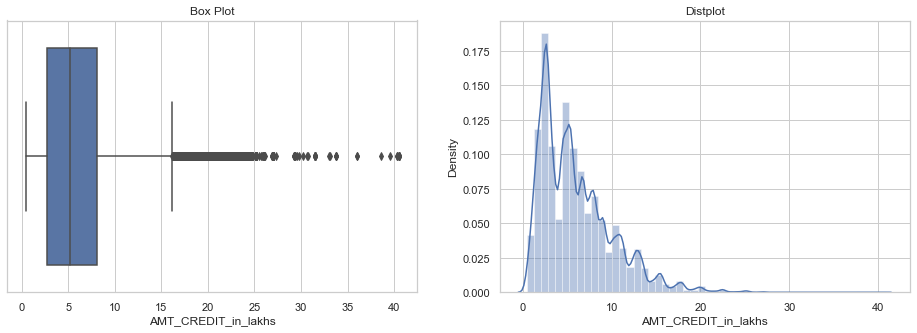

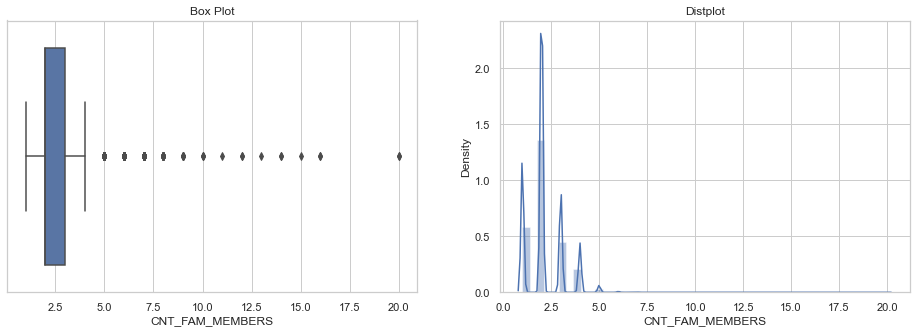

In [264]:
for i in Num_f:
    Num_A(df1,i)

#### Plotting for Categorical Features

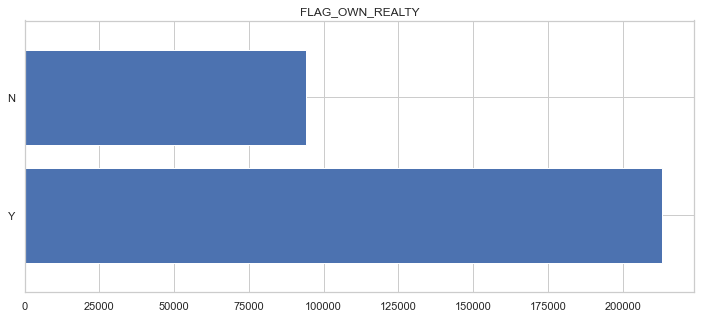

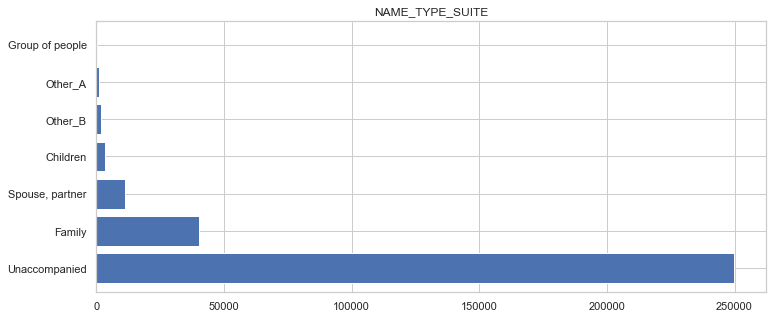

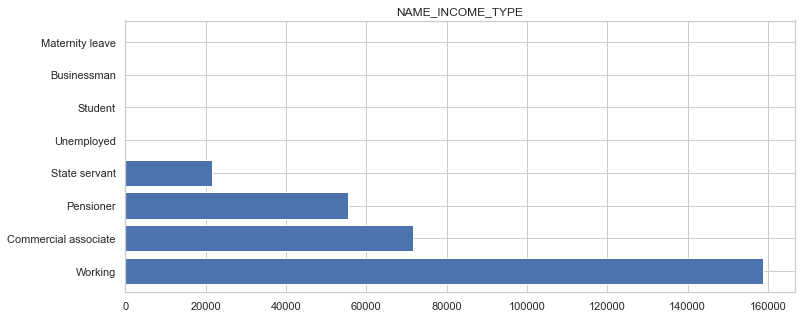

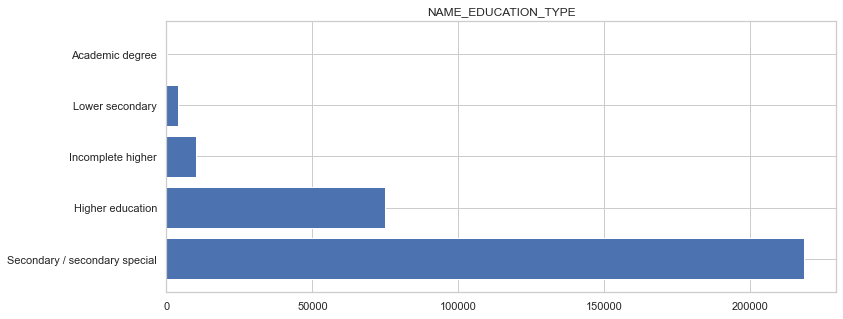

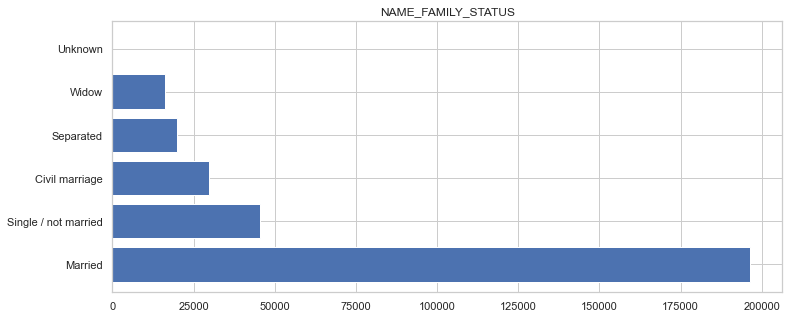

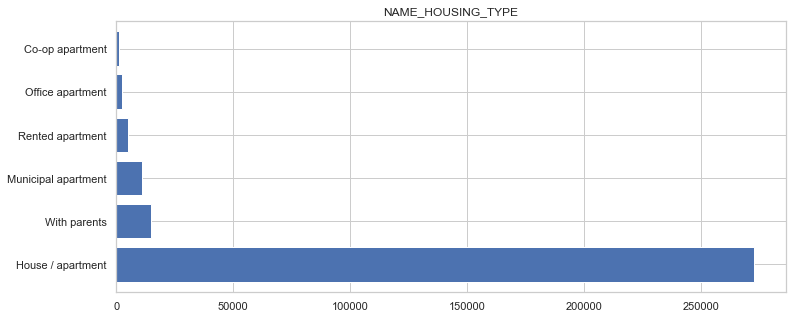

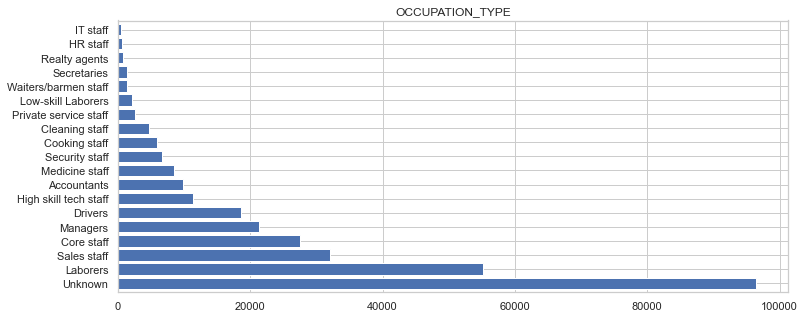

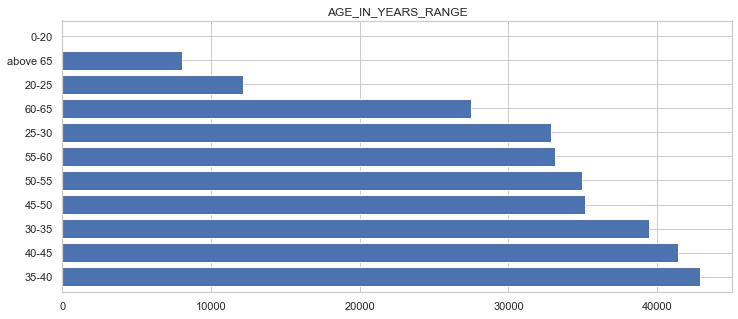

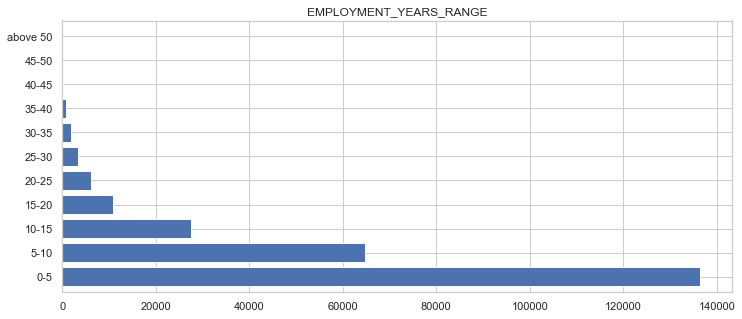

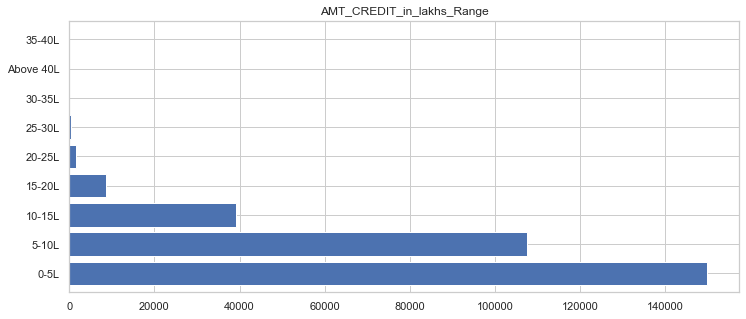

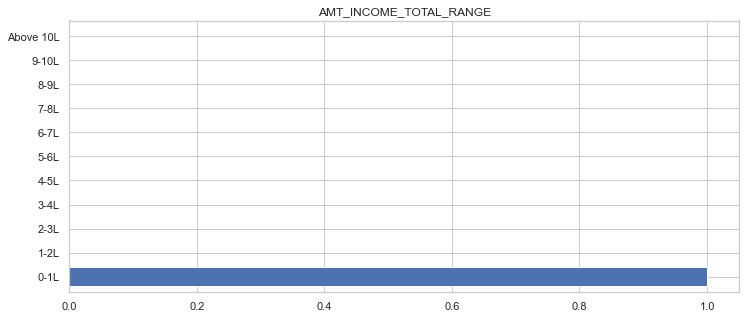

In [268]:
for i in Cat_f:
    Cat_A(df1,i)

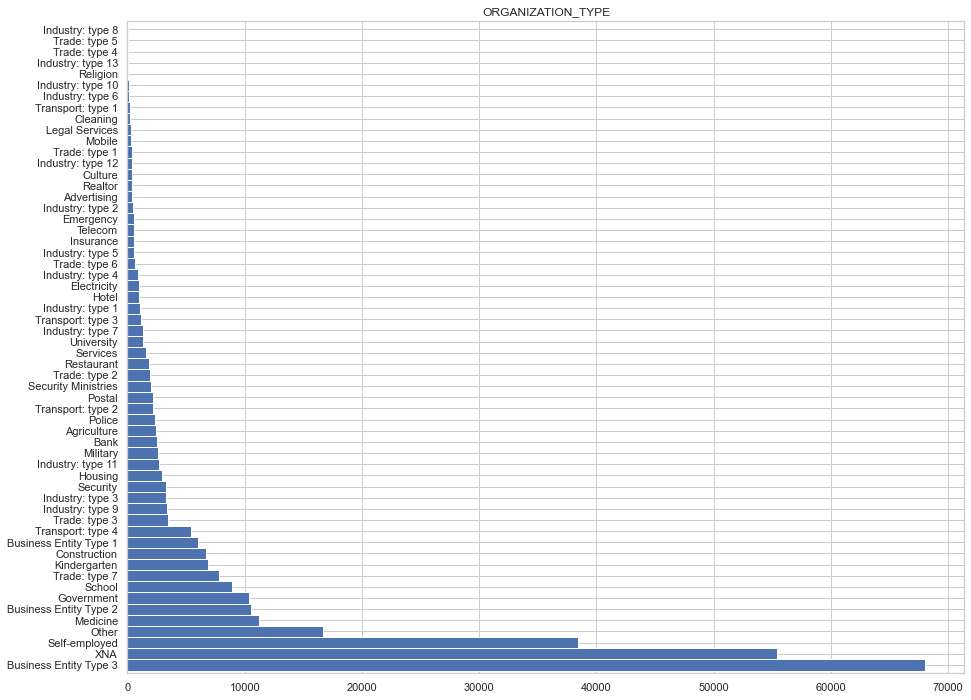

In [269]:
    sns.set(style='whitegrid')
    plt.figure(figsize = [15,12])
    df1['ORGANIZATION_TYPE'].value_counts().plot.barh(width = 1)
    plt.title('ORGANIZATION_TYPE')
    plt.show()

## Now  taking "Previous application_data.csv" as sr

In [270]:
sr.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION  ... DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0             73  ...           365243.0           42.0   
1            164  ...           365243.0          134.0   
2            301  ...           365243.0          271.0   
3            512  ...           365243.0          482.0   
4            781  ...                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0          42.0             37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                     152.0         182.0            177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL YEARLY_DECISION AMT_ANNUITY_LAKHS  \
0                       0.0               1          0.017304   
1                       1.0               1          0.251886   
2                       1.0               1          0.150607   
3                       1.0               2          0.470413   
4                       NaN               3          0.319244   

   AMT_APPLICATION_LAKHS AMT_CREDIT_LAKHS  
0                0.17145         0.171450  
1                6.07500         6.796710  
2                1.12500         1.364445  
3                4.50000         4.707900  
4                3.37500         4.040550  

[5 rows x 33 columns]

In [281]:
Cat_A_pre = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE',
                             'NAME_CLIENT_TYPE','AMT_CREDIT_LAKHS_Range','AMT_APPLICATION_LAKHS_Range',]

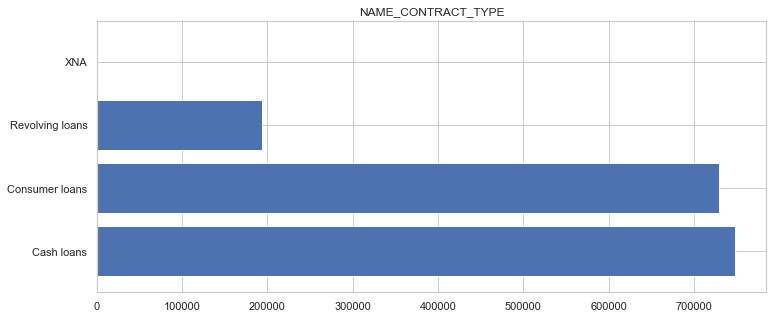

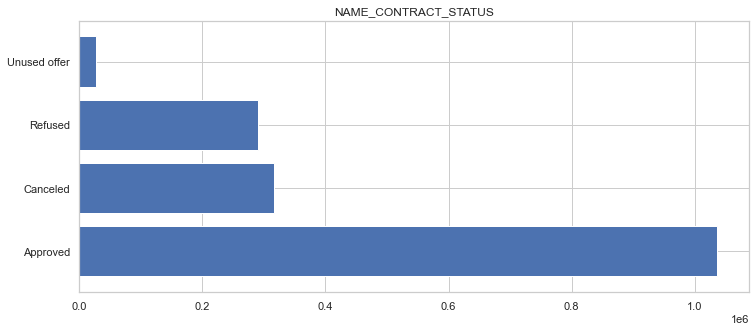

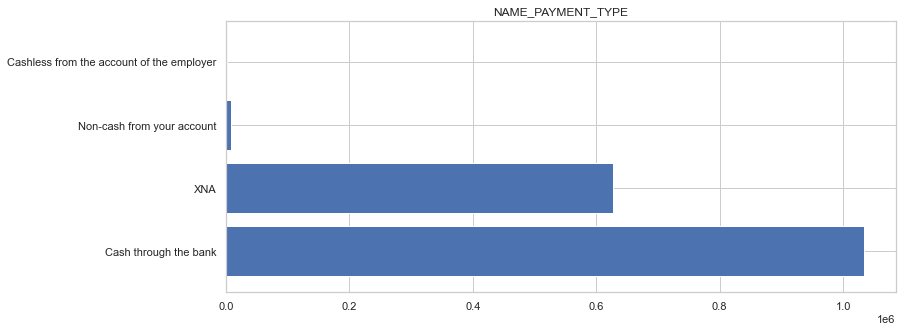

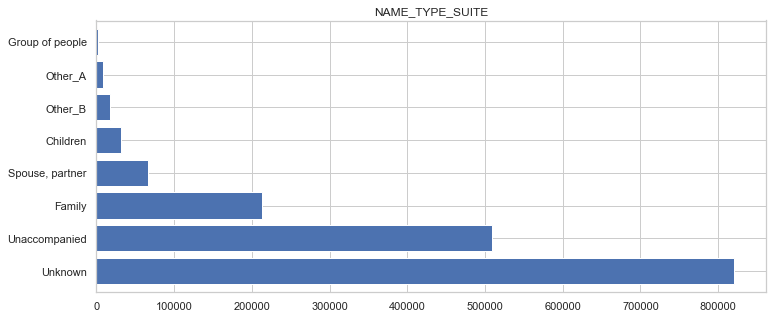

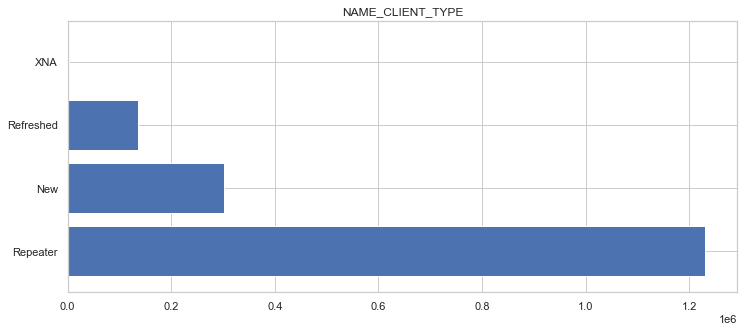

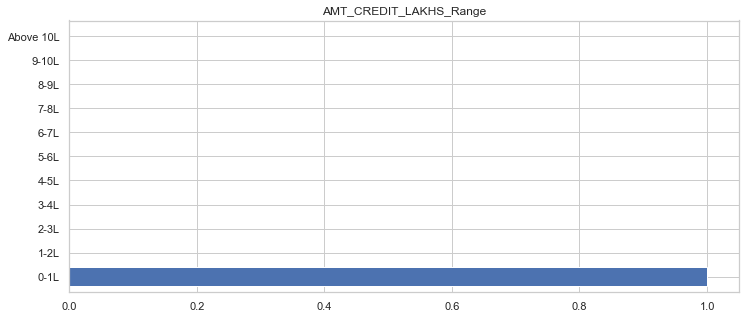

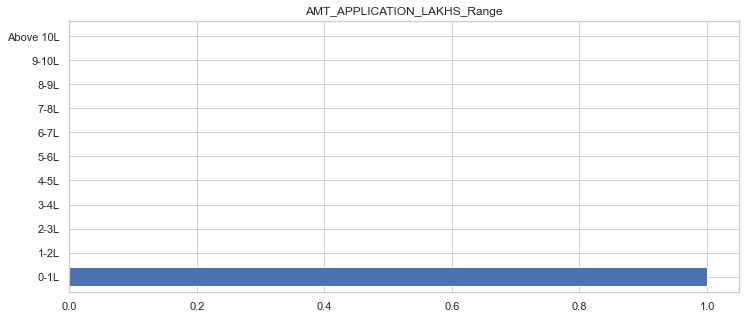

In [282]:
for i in Cat_A_pre:
    Cat_A(sr,i)

## Target Variable

#### Univariate Analysis

In [284]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0             2.025    406597.5      24700.5            3.510   
1             0             2.700   1293502.5      35698.5           11.295   
2             0             0.675    135000.0       6750.0            1.350   
3             0             1.350    312682.5      29686.5            2.970   
4             0             1.215    513000.0      21865.5            5.130   

   ... YEARS_EMPLOYED EMPLOYEMENT_YEARS AGE_IN_YEARS EMPLOYMENT_YEARS  \
0  ...       1.745205               0-5        25.92             1.75   
1  ...       3.254795               0-5        45.93             3.25   
2  ...       0.616438               0-5        52.18             0.62   
3  ...       8.326027              5-10        52.07             8.33   
4  ...       8.323288              5-10        54.61             8.32   

  AGE_IN_YEARS_RANGE  EMPLOYMENT_YEARS_RANGE  AMT_INCOME_TOTAL_in_lakhs  \
0              25-30                     0-5                        0.0   
1              45-50                     0-5                        0.0   
2              50-55                     0-5                        0.0   
3              50-55                    5-10                        0.0   
4              50-55                    5-10                        0.0   

   AMT_CREDIT_in_lakhs  AMT_CREDIT_in_lakhs_Range  AMT_INCOME_TOTAL_RANGE  
0                 4.07                       0-5L                     NaN  
1                12.94                     10-15L                     NaN  
2                 1.35                       0-5L                     NaN  
3                 3.13                       0-5L                     NaN  
4                 5.13                      5-10L                     NaN  

[5 rows x 62 columns]

In [298]:
Categorical_Data = ['NAME_CONTRACT_TYPE','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','AGE_IN_YEARS_RANGE',
                      'EMPLOYMENT_YEARS_RANGE','AMT_CREDIT_in_lakhs_Range','AMT_INCOME_TOTAL_RANGE']

Numarical_Data = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Credit_Ratio']

In [290]:
Target_Variable_Payment_Difficulty = df1[df1.TARGET == 1]
Target_Variable_All_Other = df1[df1.TARGET == 0]

In [292]:
Target_Variable_All_Other.CODE_GENDER.value_counts()

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

#### function for categorical variables

In [326]:
def Target_cat(variable):
    

    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    
    sns.countplot(x=variable, data=Target_Variable_Payment_Difficulty,linewidth=1,ax=ax1,edgecolor=sns.color_palette("dark", 3),hue =variable )
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {variable} Target Payment_Difficulty',fontsize=18)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(Target_Variable_Payment_Difficulty))*100), (p.get_x()+0.4, p.get_height()+100), ha='center')
        
    sns.countplot(x=variable, data=Target_Variable_All_Other,ax=ax2,linewidth=1,edgecolor=sns.color_palette("dark", 3),hue =variable )
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {variable} Target All_Other',fontsize = 18,)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(Target_Variable_All_Other))*100), (p.get_x()+0.4, p.get_height()+100), ha='center')
    
    plt.show()

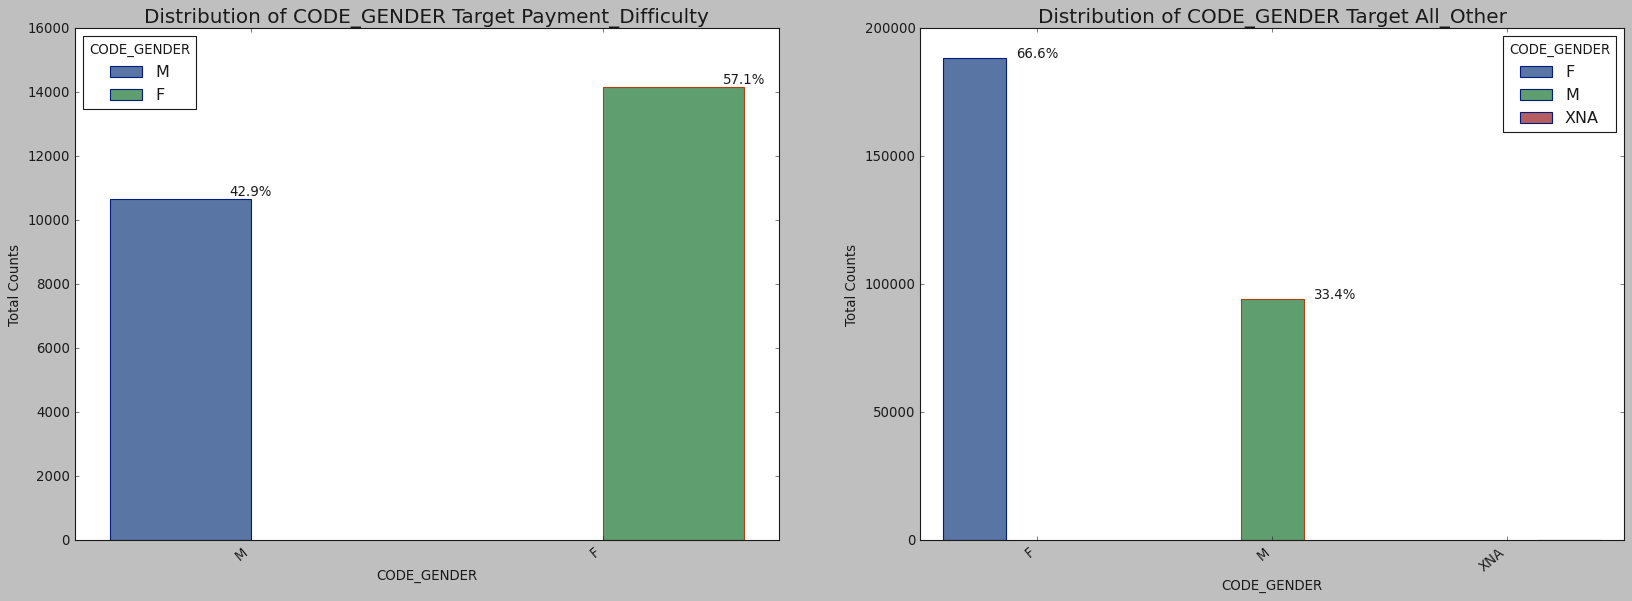

In [327]:
Target_cat('CODE_GENDER')

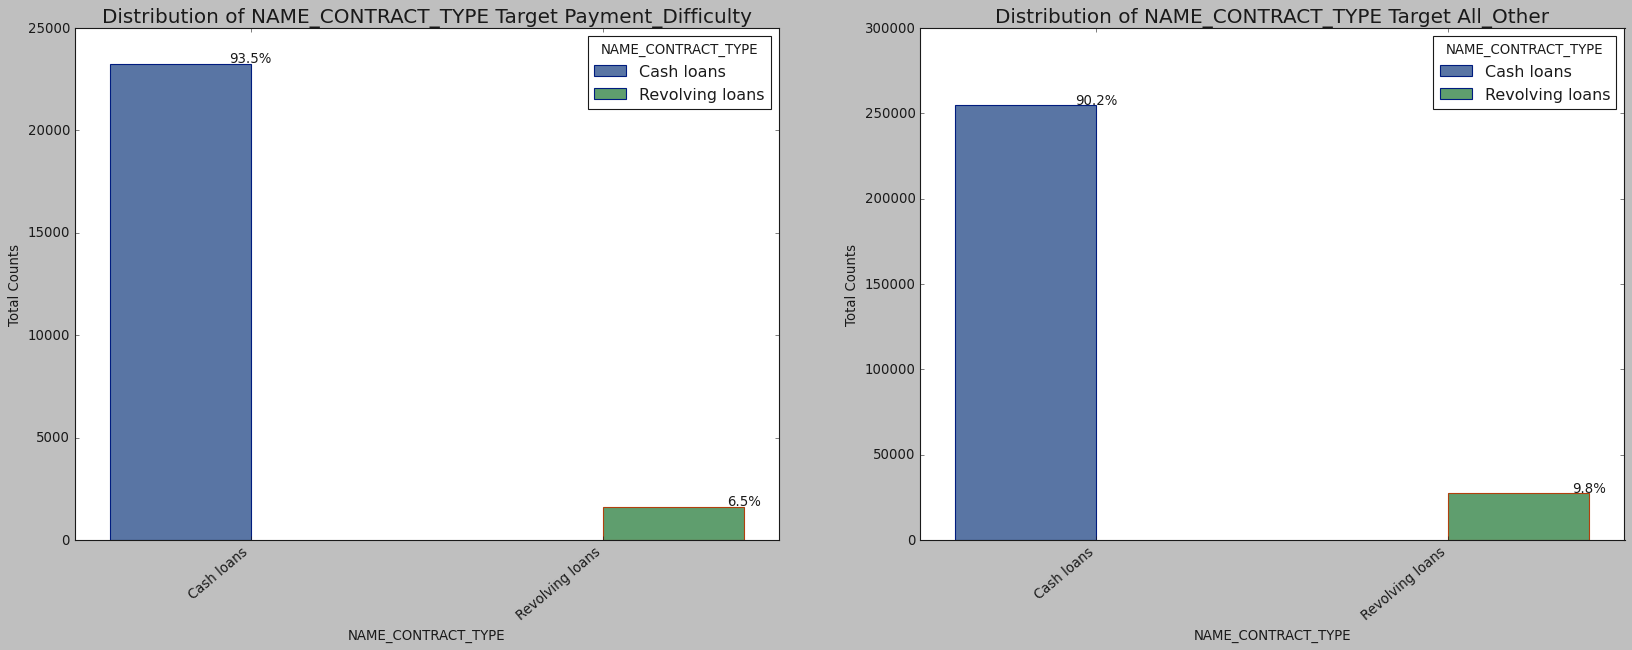

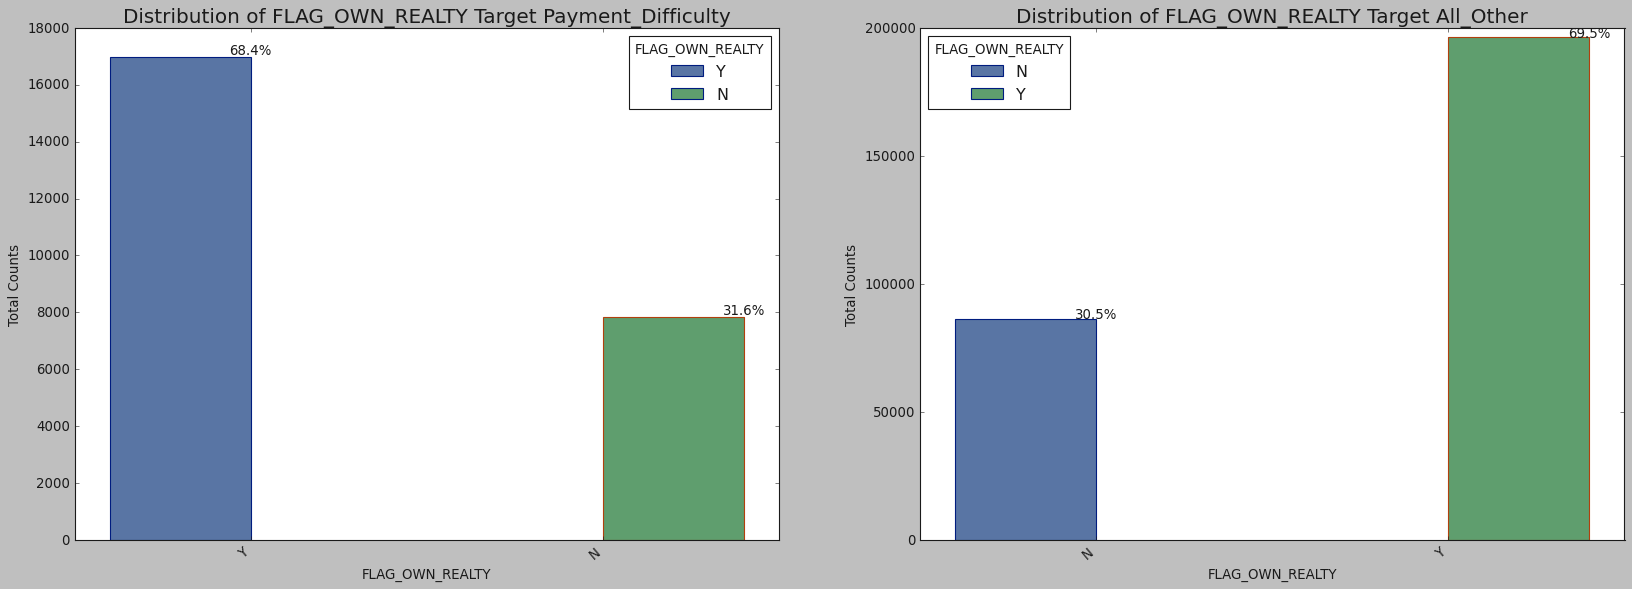

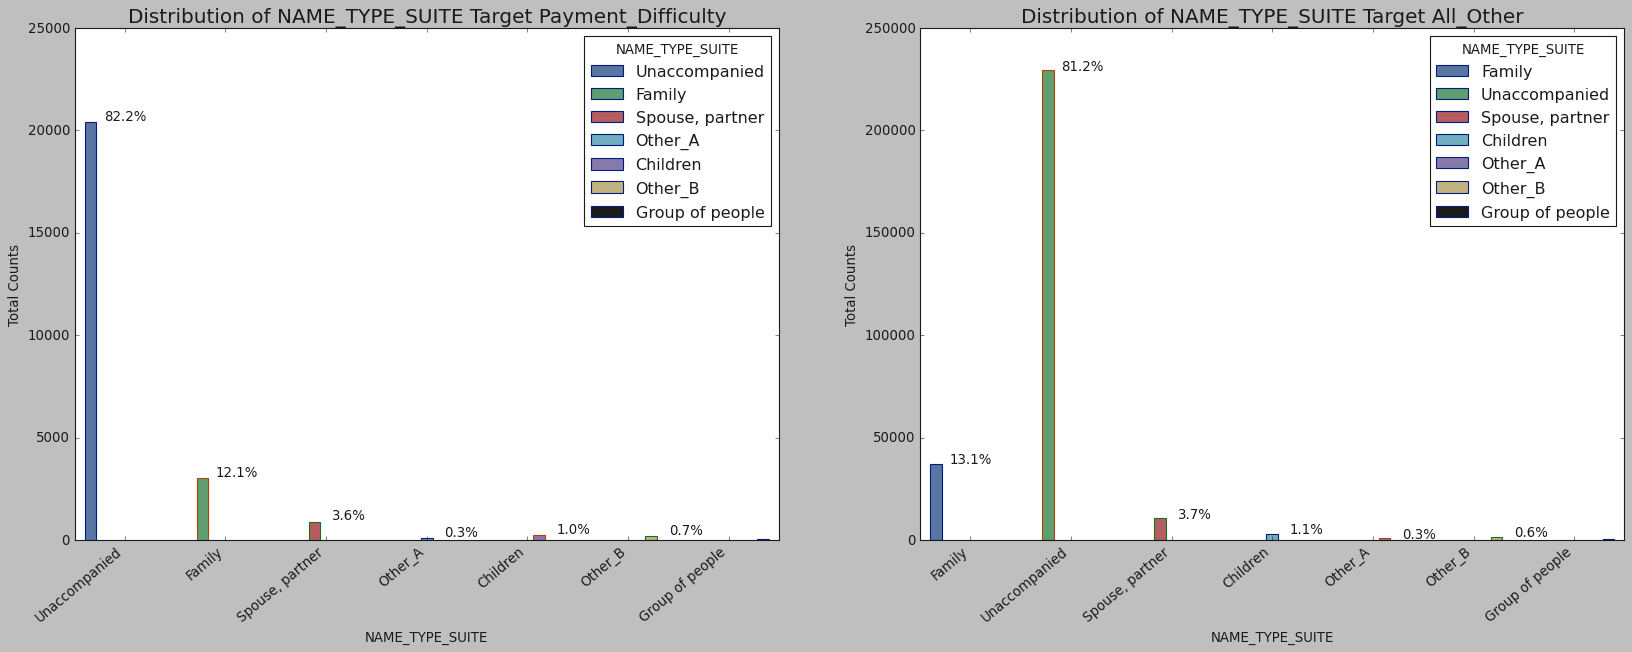

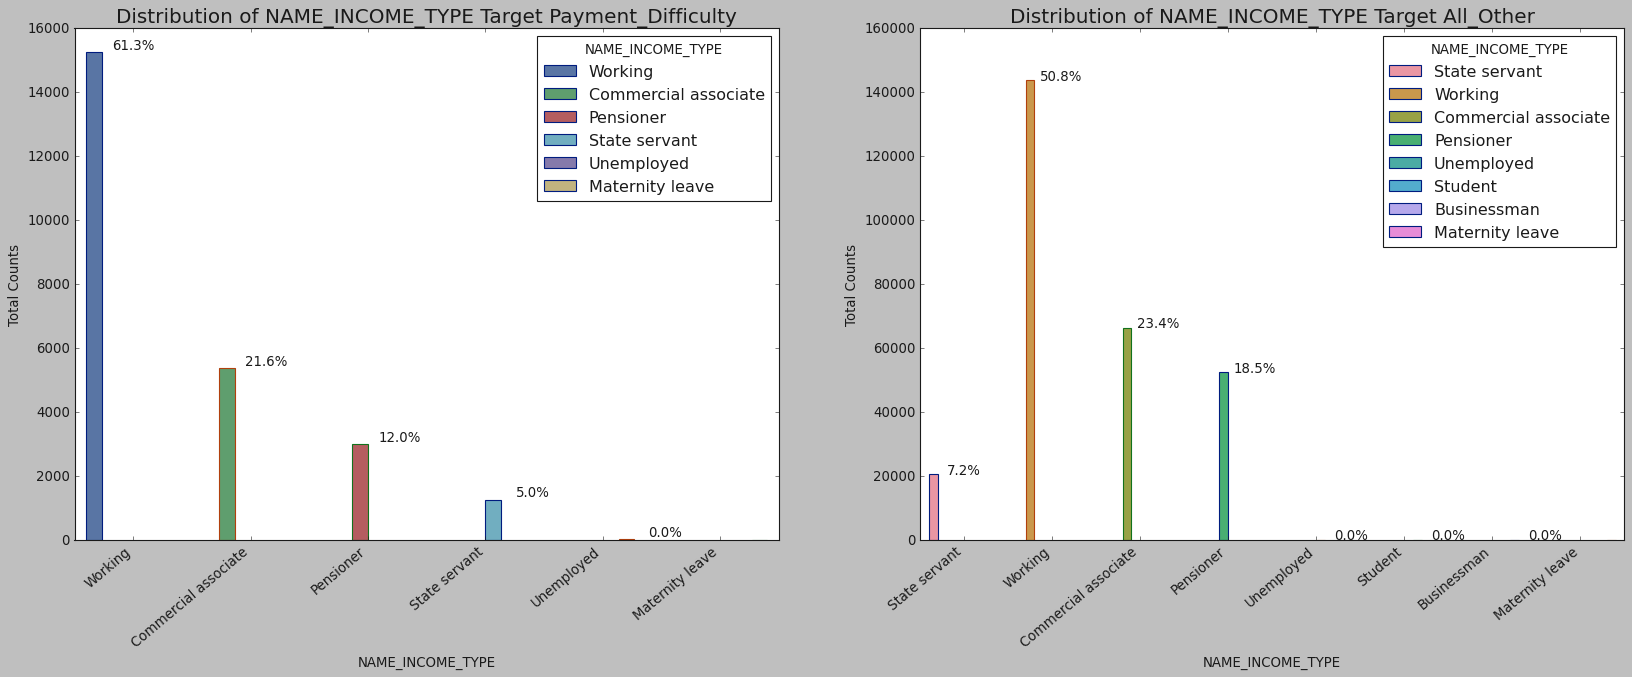

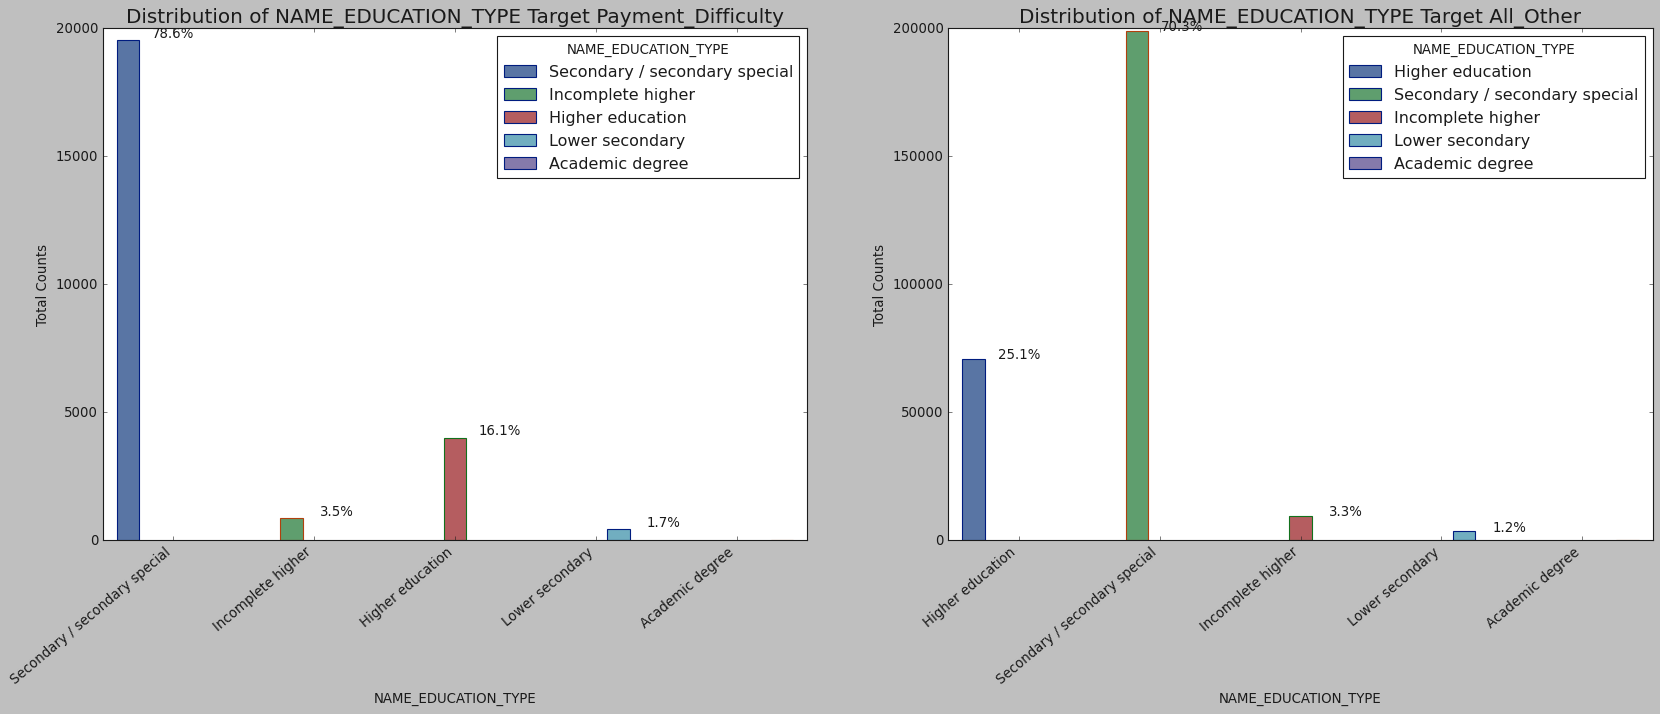

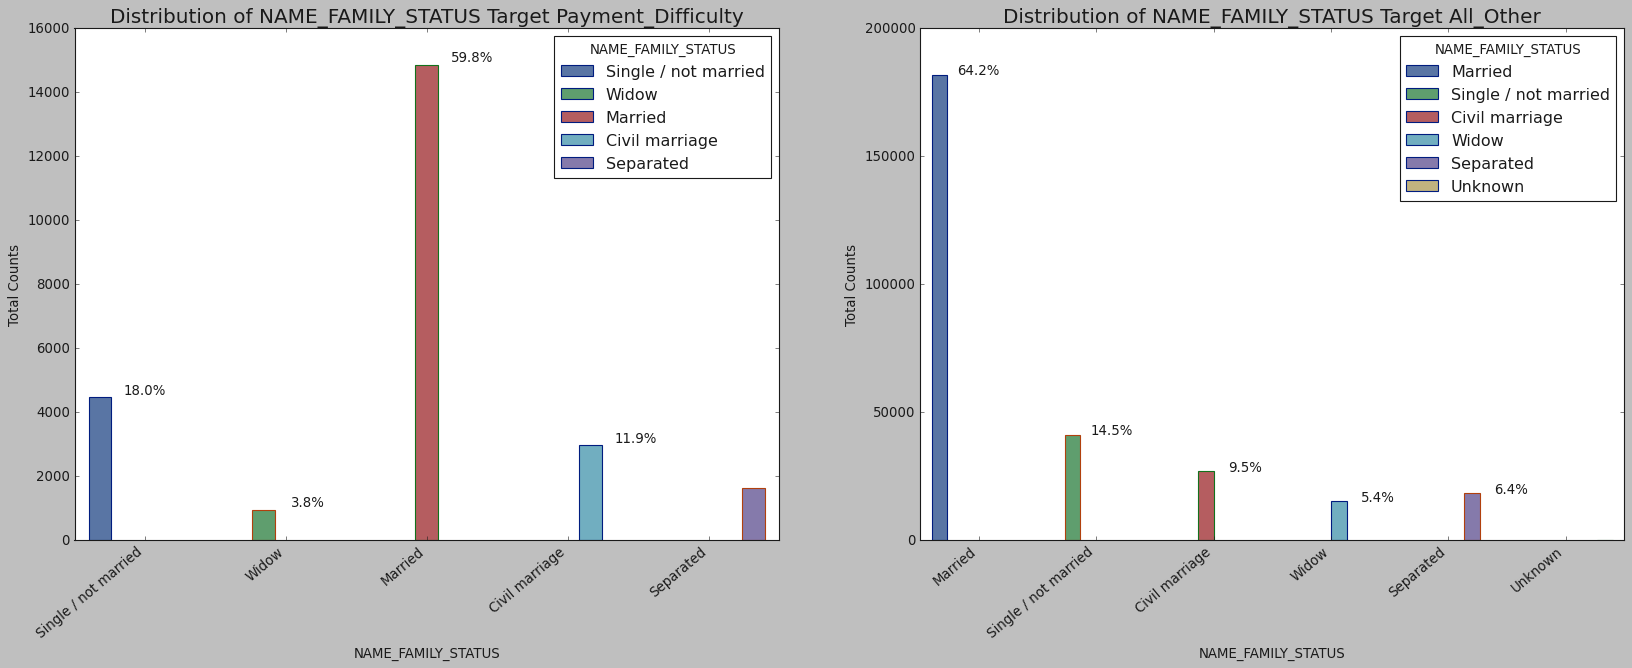

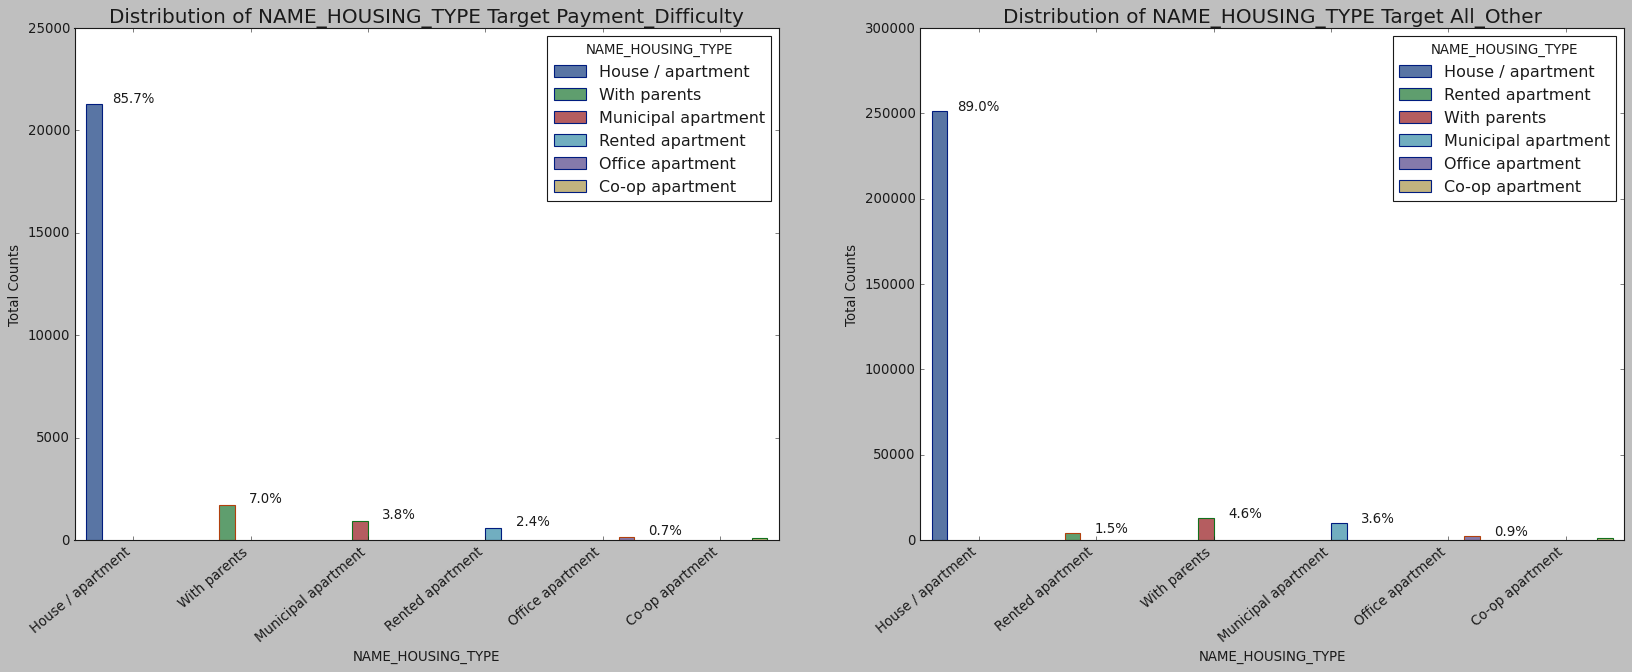

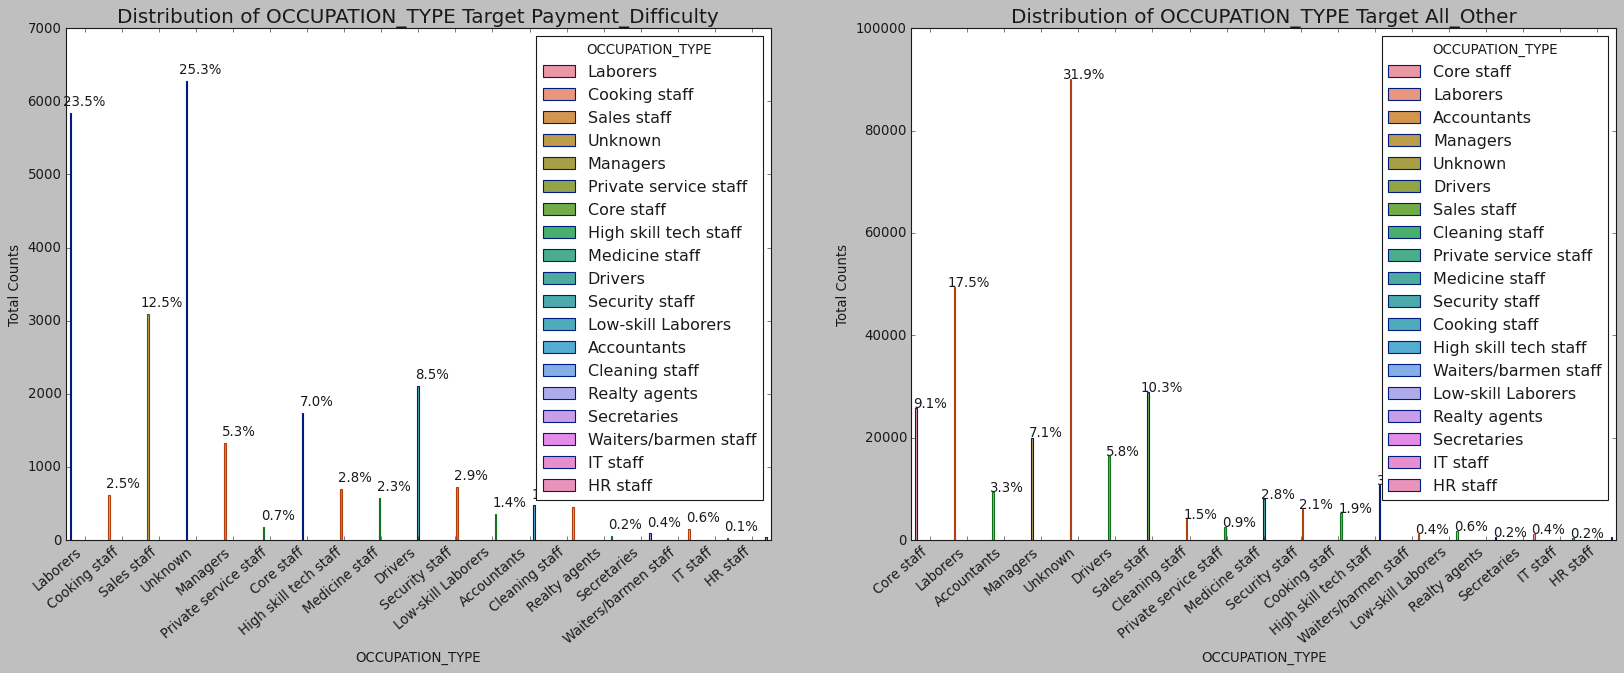

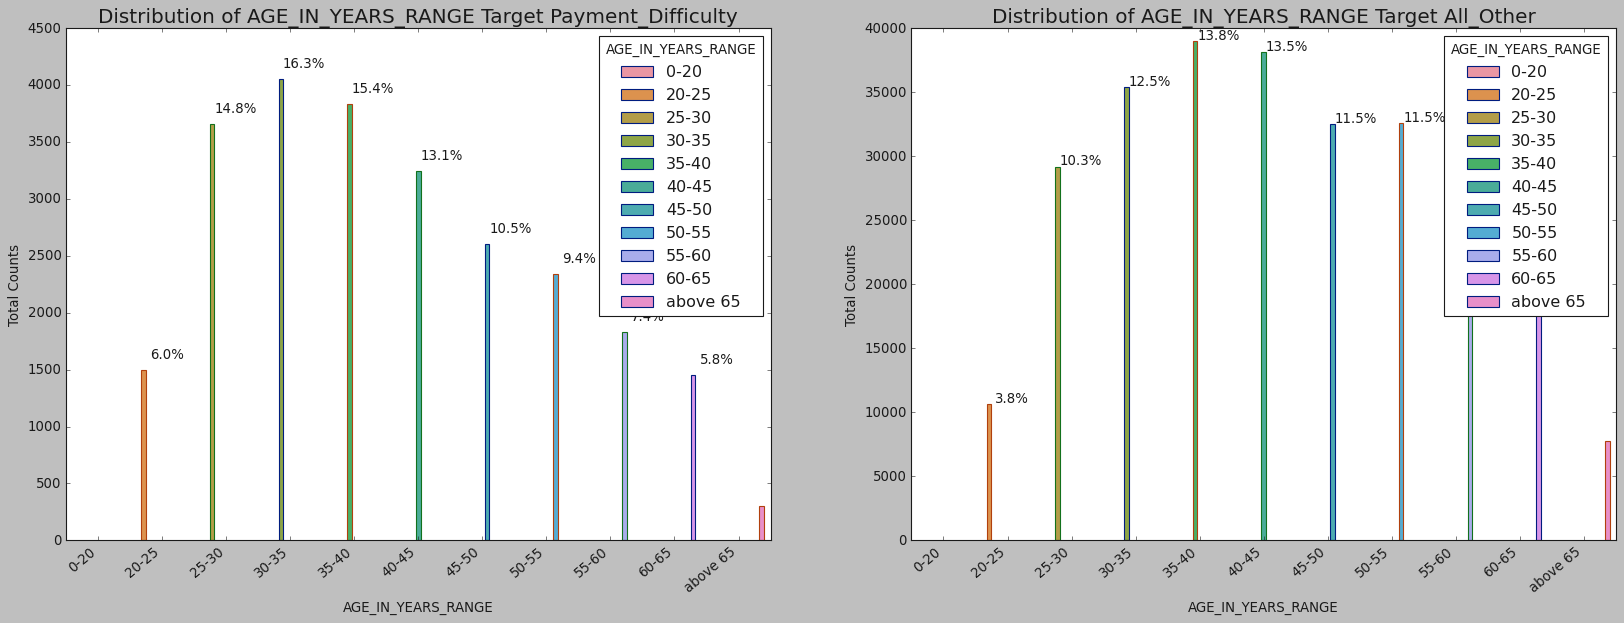

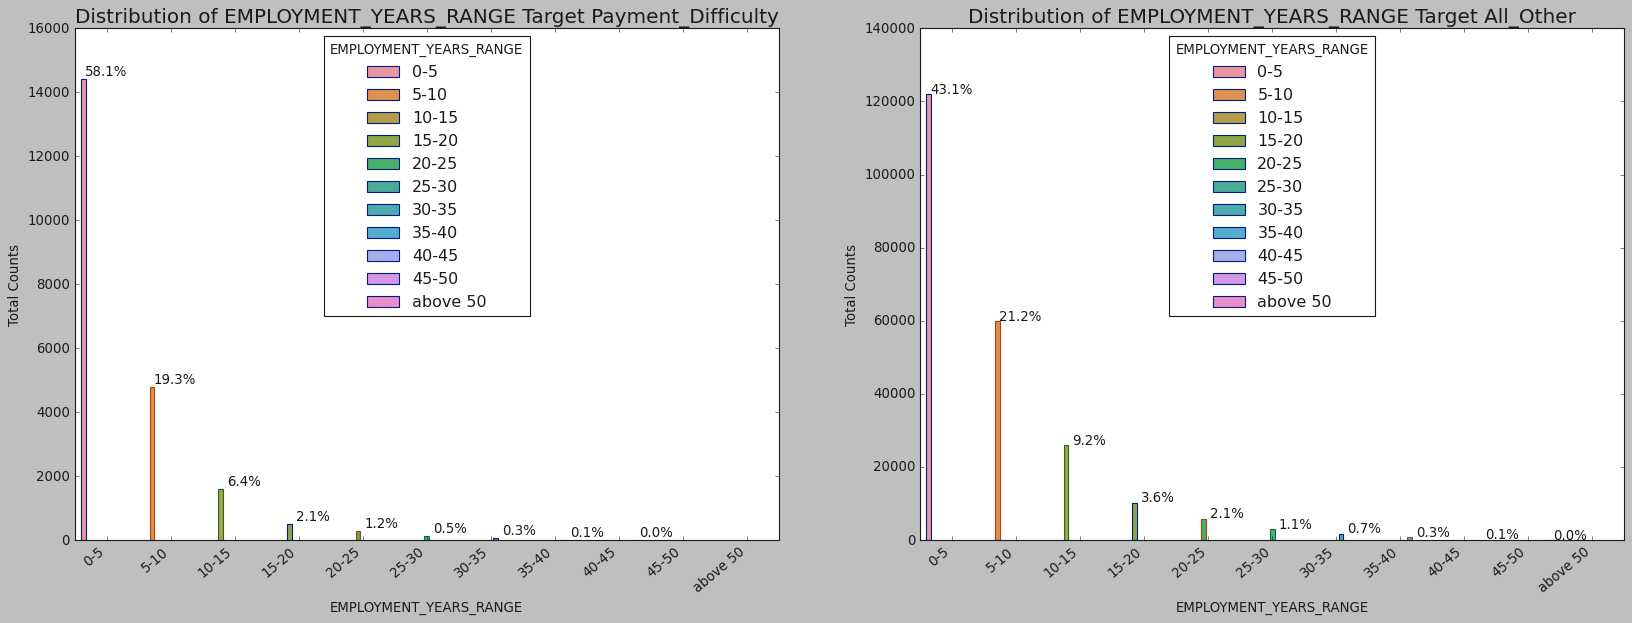

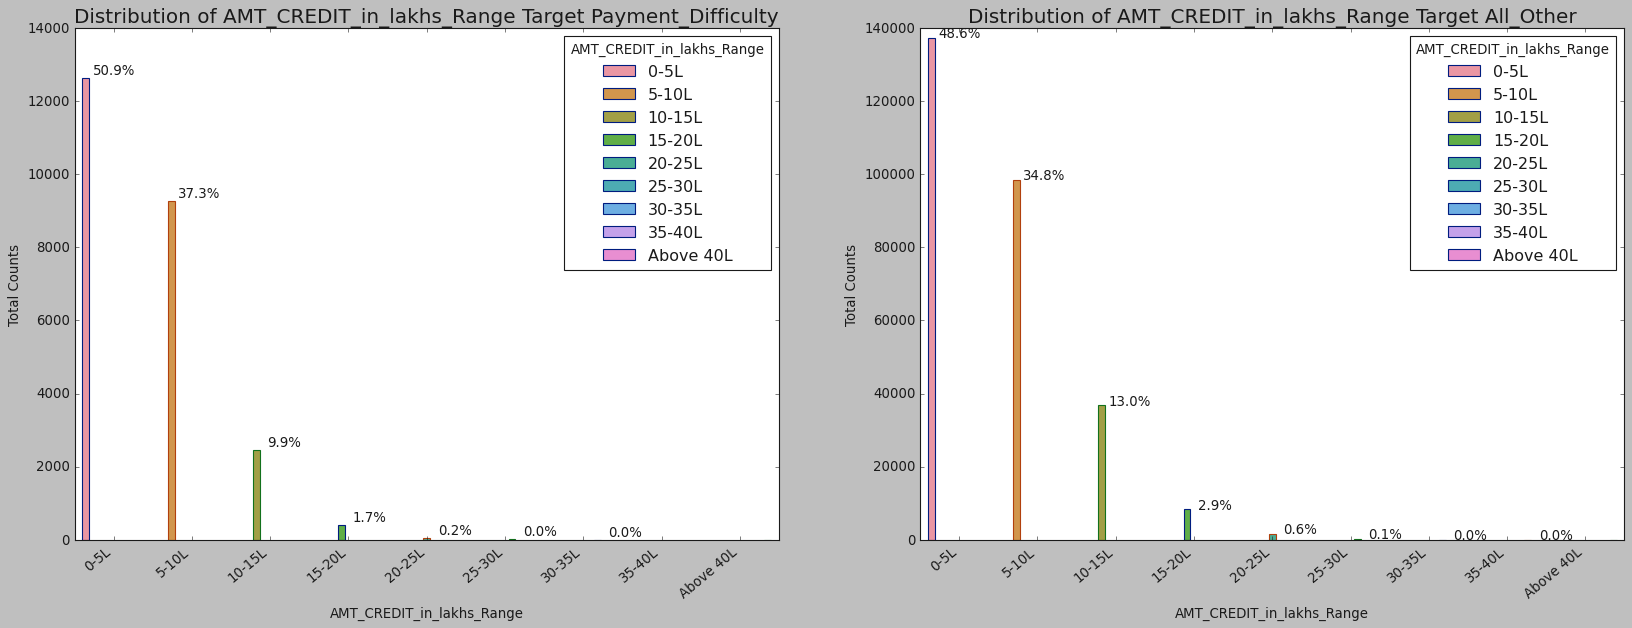

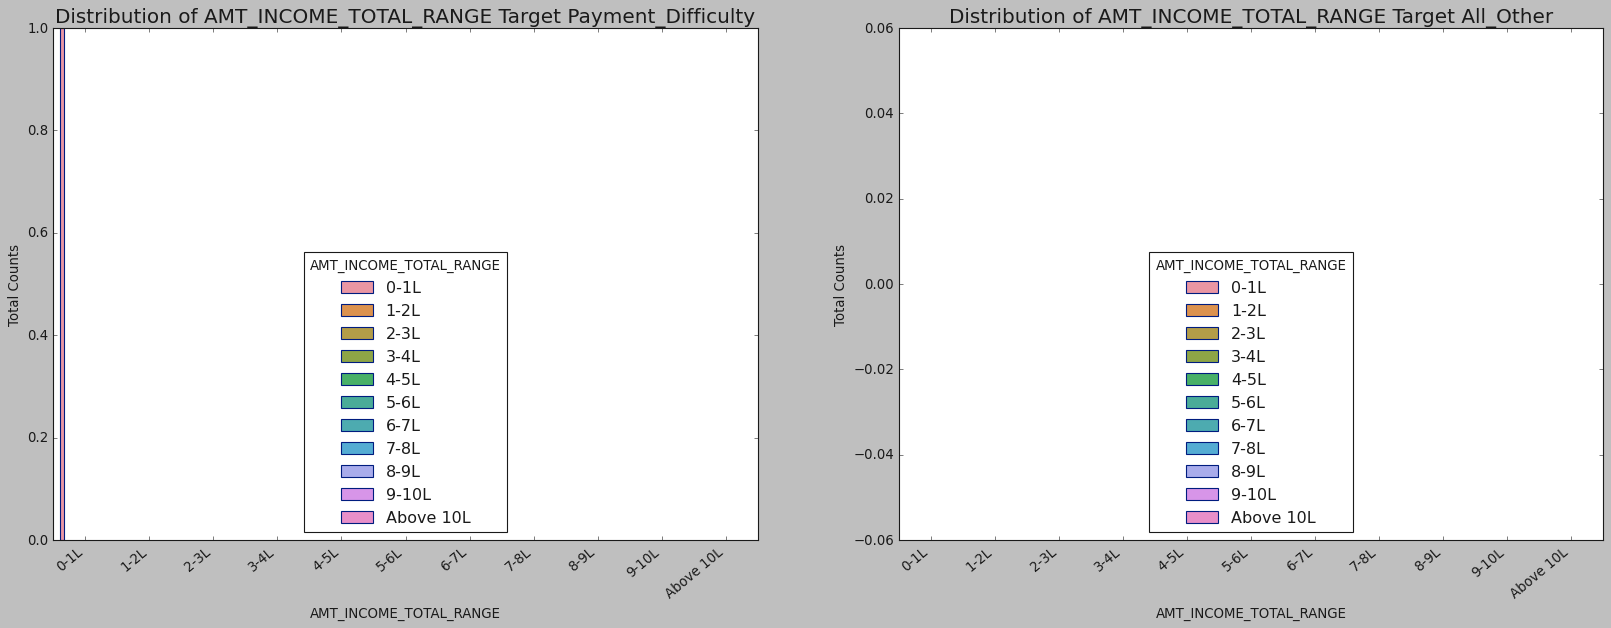

In [328]:
for i in Categorical_Data:
    Target_cat(i)

In [300]:
# function to plot for categorical variables
def Target_Num(variable):
    
    sns.set(style='darkgrid')
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(Target_Variable_Payment_Difficulty[variable].dropna())
    plt.title(f'Distribution of {variable} Payment_Difficulty',fontsize=15)
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.distplot(Target_Variable_All_Other[variable].dropna())
    plt.title(f'Distribution of {variable} All Other',fontsize=15)
    plt.xlabel(variable)
    
    plt.show()
    

### DAYS_EMPLOYED

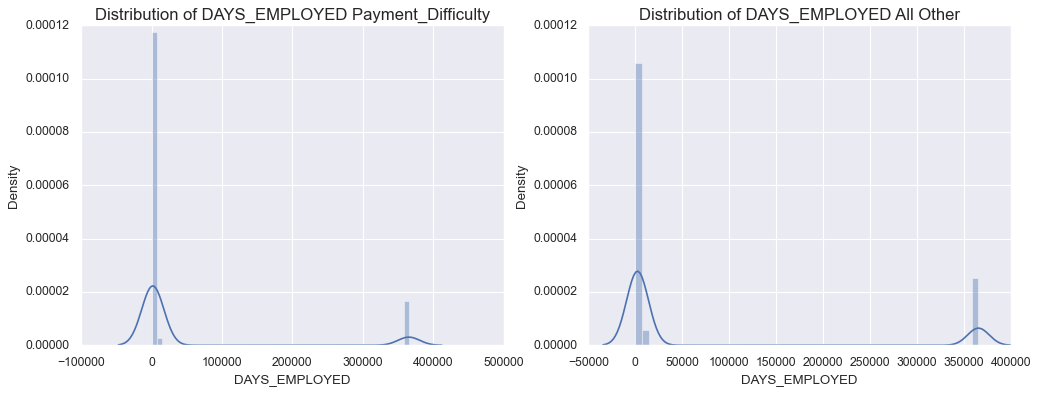

In [303]:
Target_Num("DAYS_EMPLOYED")

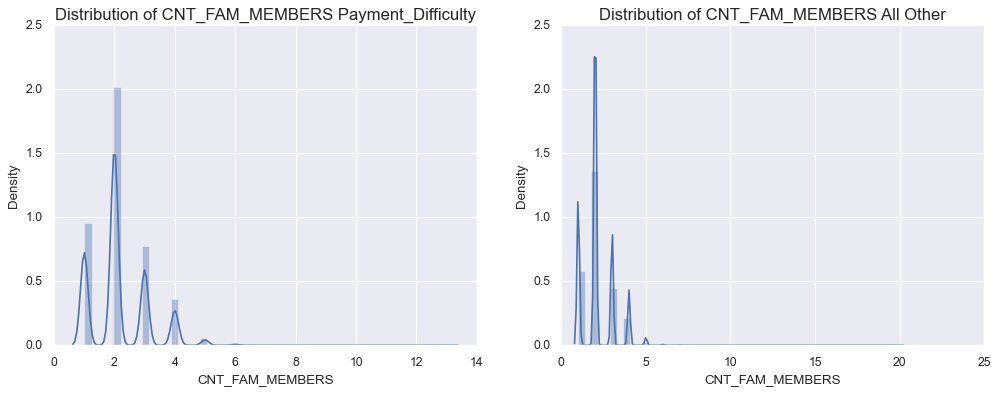

In [304]:
Target_Num("CNT_FAM_MEMBERS")

### CNT_FAM_MEMBERS

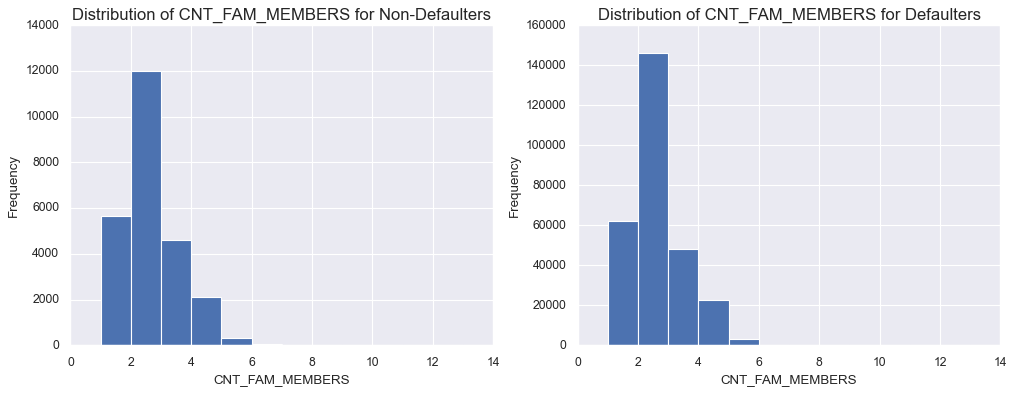

In [305]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
Target_Variable_Payment_Difficulty['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')

plt.subplot(1, 2, 2)
Target_Variable_All_Other['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')

plt.show()

### Byvariate Analysis

#### plotting Scatter plot of Target & AMT Features

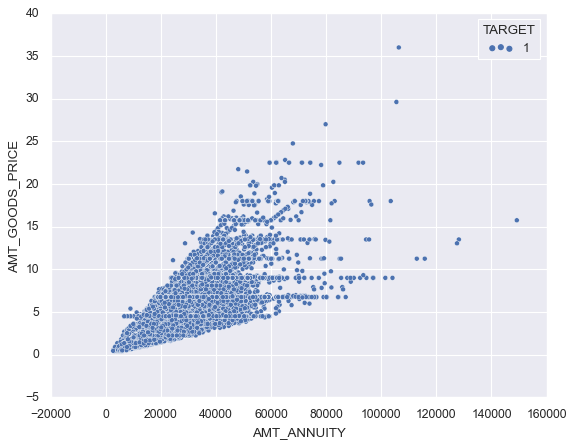

In [307]:
sns.scatterplot(x=Target_Variable_Payment_Difficulty.AMT_ANNUITY, 
                y = Target_Variable_Payment_Difficulty.AMT_GOODS_PRICE, 
                data=Target_Variable_Payment_Difficulty,hue = 'TARGET')
plt.show()

In [315]:
def Target_Num_Bi(variable_1, variable_2):
    # other thems of plot seaborn-colorblind,seaborn-dark-palette ,classic

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=variable_1, y=variable_2,data=Target_Variable_Payment_Difficulty,ax=ax1)
    ax1.set_xlabel(variable_1)    
    ax1.set_ylabel(variable_2)
    ax1.set_title(f'{variable_1} vs {variable_2} Target Payment_Difficulty',fontsize=15)
    
    sns.scatterplot(x=variable_1, y=variable_2,data=Target_Variable_All_Other,ax=ax2)
    ax2.set_xlabel(variable_1)    
    ax2.set_ylabel(variable_2)
    ax2.set_title(f'{variable_1} vs {variable_2} Target All_Other',fontsize=15)
            
    plt.show()

In [317]:
Target_Num("AGE_IN_YEARS", "AMT_INCOME_TOTAL_in_lakhs")

TypeError: Target_Num() takes 1 positional argument but 2 were given

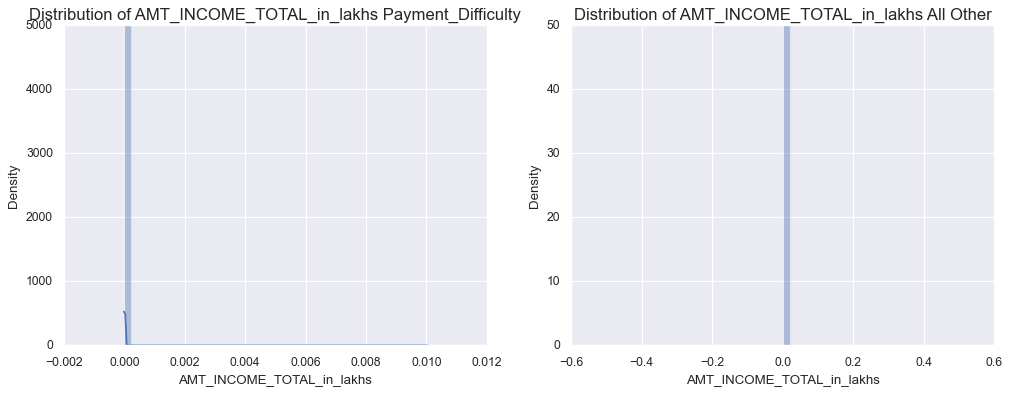

In [313]:
Target_Num("AMT_INCOME_TOTAL_in_lakhs")

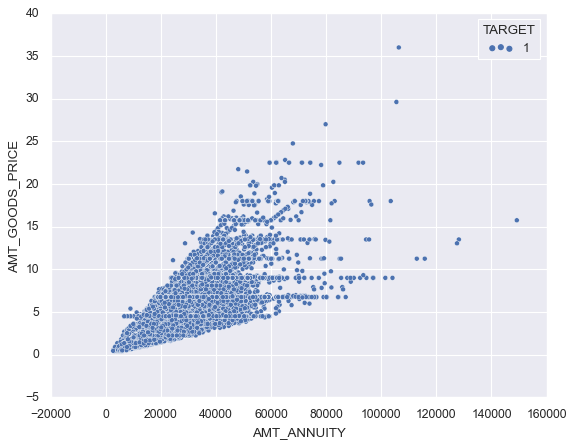

In [319]:
sns.scatterplot(x=Target_Variable_Payment_Difficulty.AMT_ANNUITY, y = Target_Variable_Payment_Difficulty.AMT_GOODS_PRICE, data=Target_Variable_Payment_Difficulty,hue = 'TARGET')
plt.show()

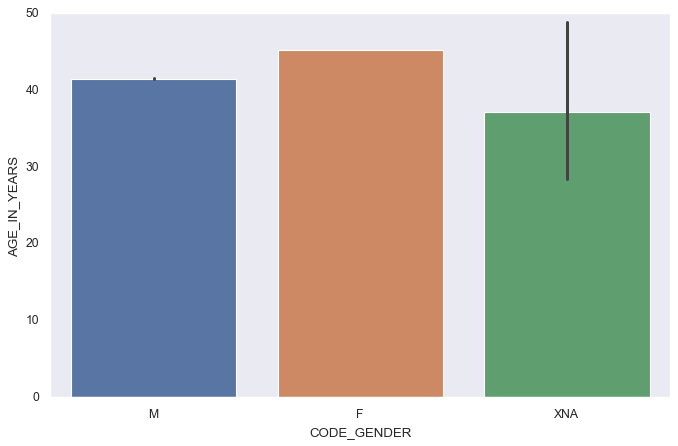

In [321]:
plt.figure(figsize = [10,6])
sns.set(style='dark')
sns.barplot(x = df1.CODE_GENDER,y = df1.AGE_IN_YEARS)
plt.show()

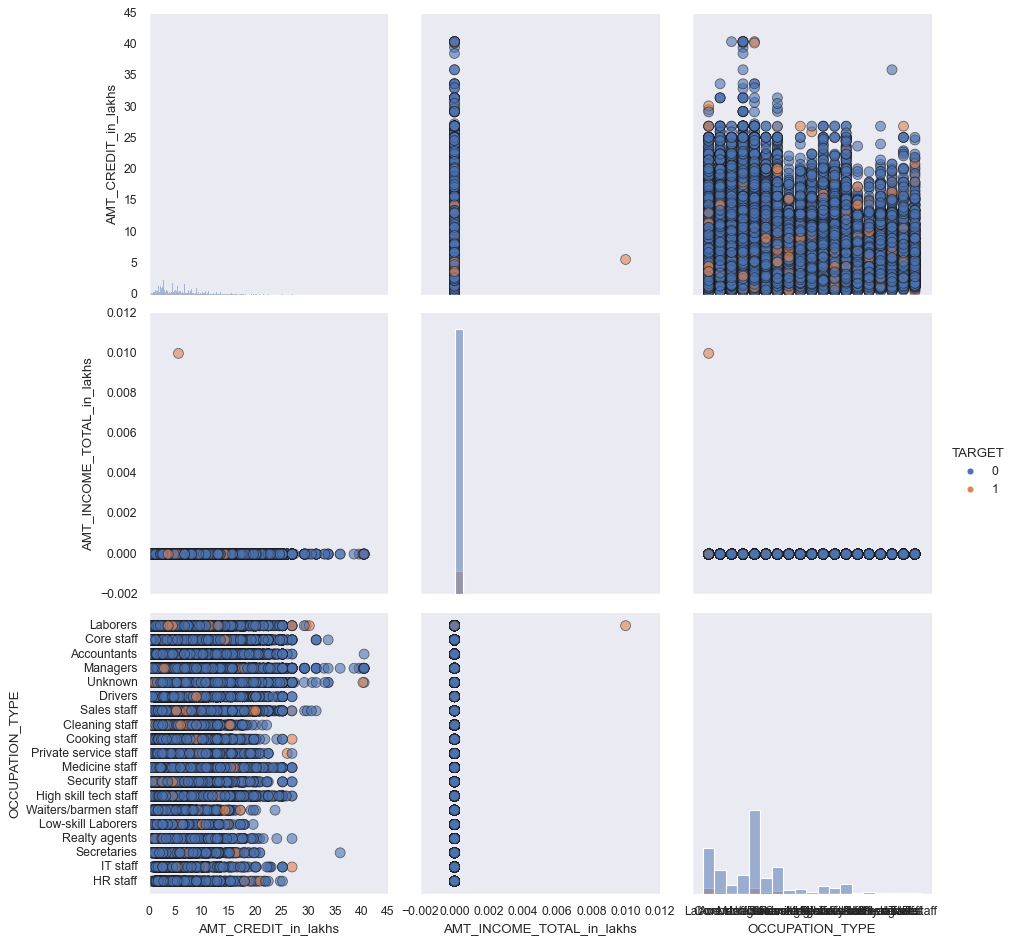

In [322]:
sns.pairplot(df1,vars = ['AMT_CREDIT_in_lakhs','AMT_INCOME_TOTAL_in_lakhs','OCCUPATION_TYPE'],
             diag_kind = 'hist', hue = 'TARGET',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

### Heatmap of Target variable

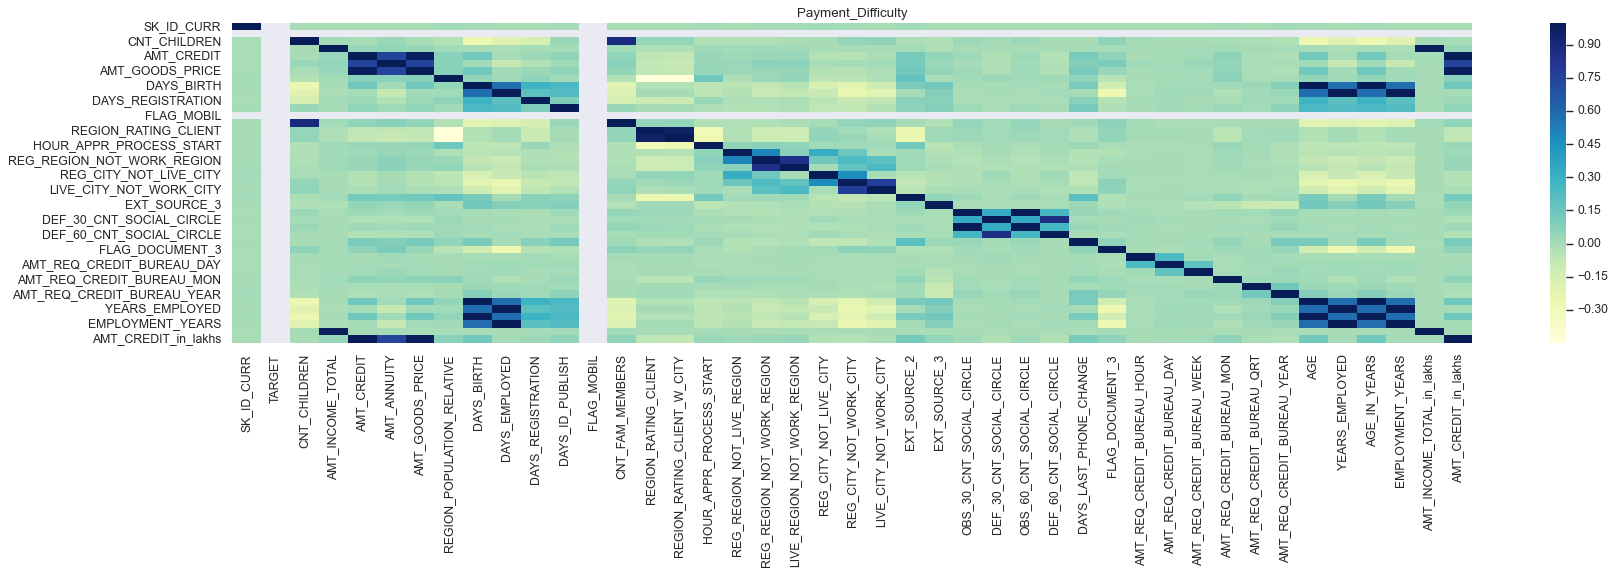

In [323]:
plt.figure(figsize=(25, 5))
sns.heatmap(Target_Variable_Payment_Difficulty.corr(),cmap="YlGnBu")
plt.title('Payment_Difficulty')
plt.show()

### Heatmap of all Features

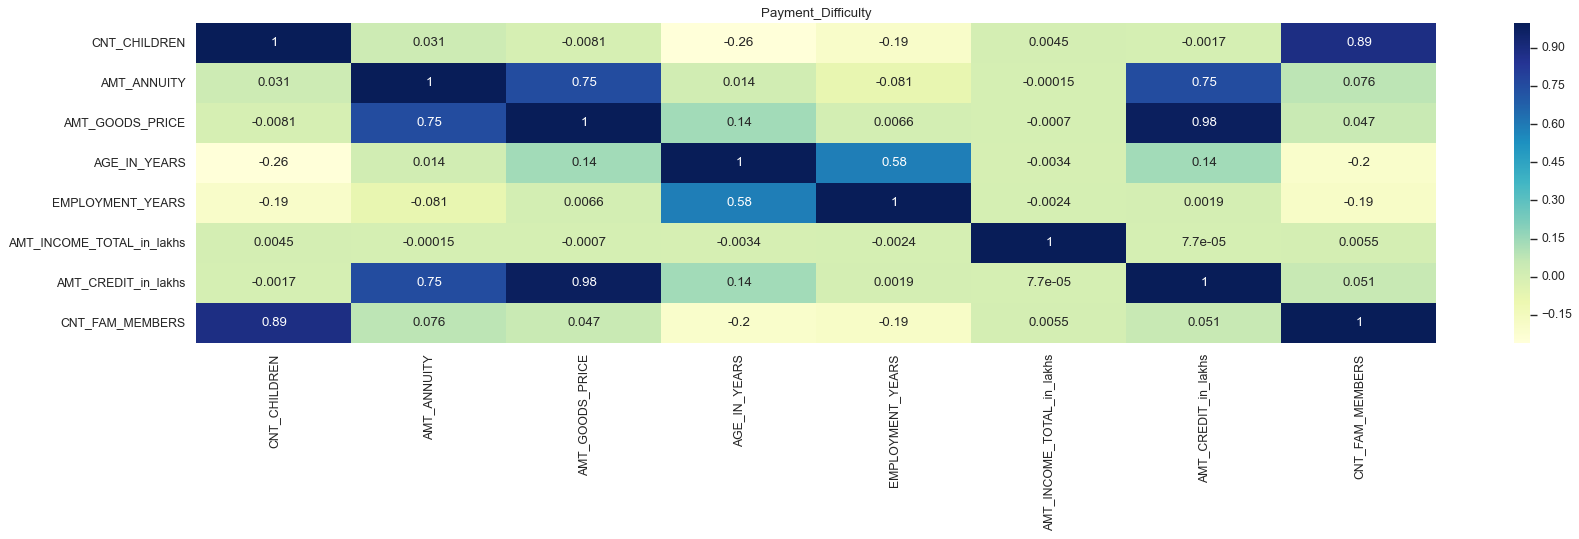

In [325]:
df_2 = Target_Variable_Payment_Difficulty[['CNT_CHILDREN','AMT_ANNUITY','AMT_GOODS_PRICE','AGE_IN_YEARS','EMPLOYMENT_YEARS','AMT_INCOME_TOTAL_in_lakhs',
        'AMT_CREDIT_in_lakhs','CNT_FAM_MEMBERS','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','NAME_HOUSING_TYPE']]


plt.figure(figsize=(25, 5))
sns.heatmap(df_2.corr(method = 'pearson'),cmap = 'YlGnBu', annot=True)
plt.title('Payment_Difficulty')
plt.show()

In [341]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [343]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(df1.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(df1.select_dtypes(["int","float"]).columns)  #N Numerical Column list

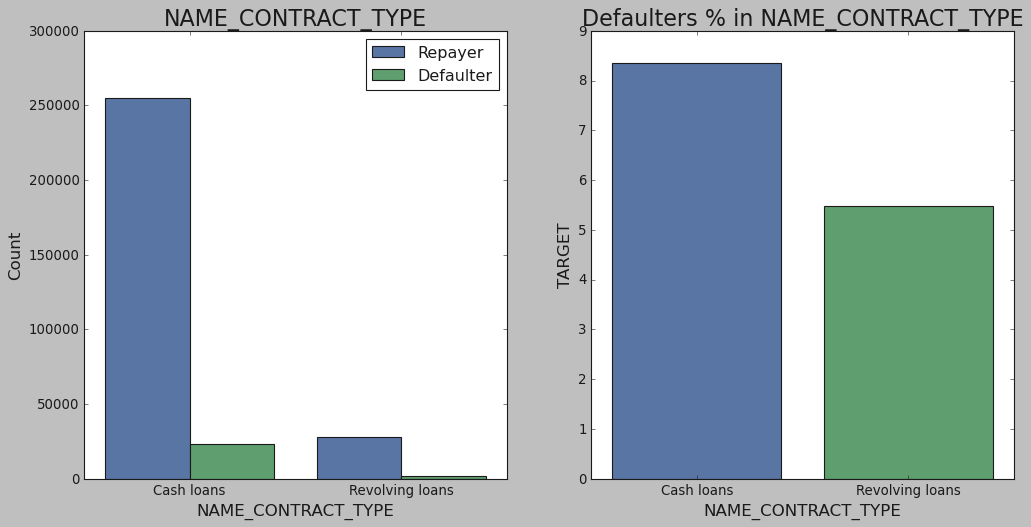

In [344]:
#1 Checking the contract type based on loan repayment status
univariate(df1,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

### The Revolving loans are very less
### Defaulters in Cash loans are around 8-9% Whereas Revolving loans having around 5-6% defaulters


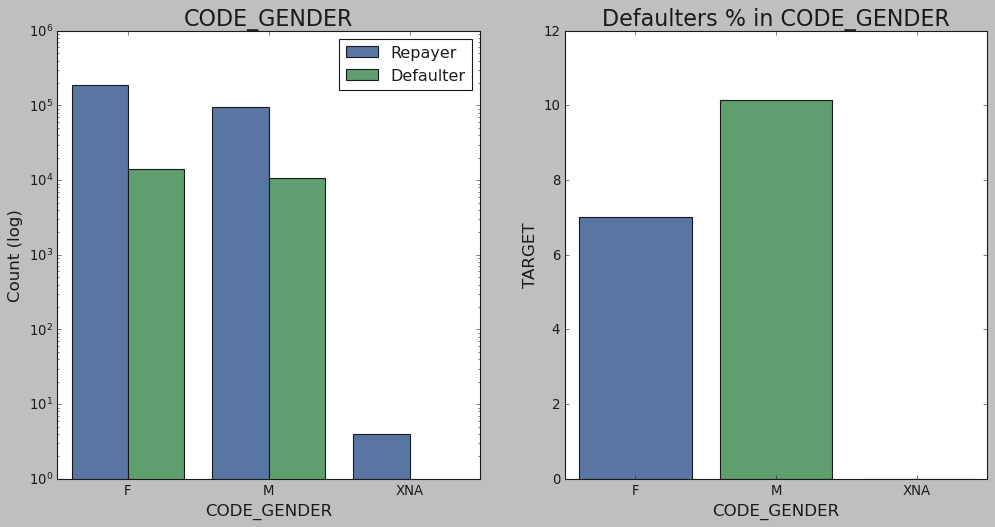

In [346]:
#2 Checking the type of Gender on loan repayment status
univariate(df1,"CODE_GENDER","TARGET",True,False,True)

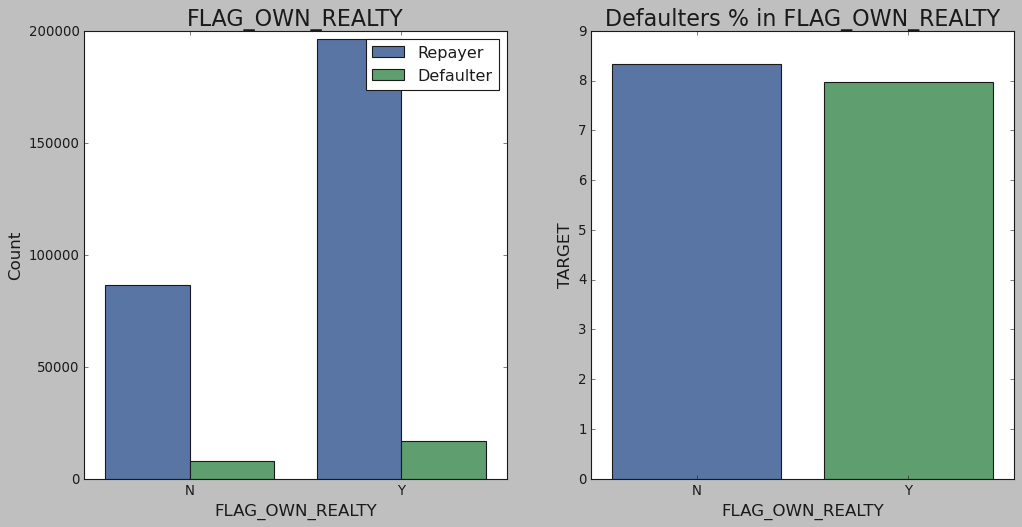

In [347]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(df1,"FLAG_OWN_REALTY","TARGET",False,False,True)

#### The real Estate invested are around double in numbers than not.
#### The plot showing around same percentage so it can’t be conclude to a particular decision


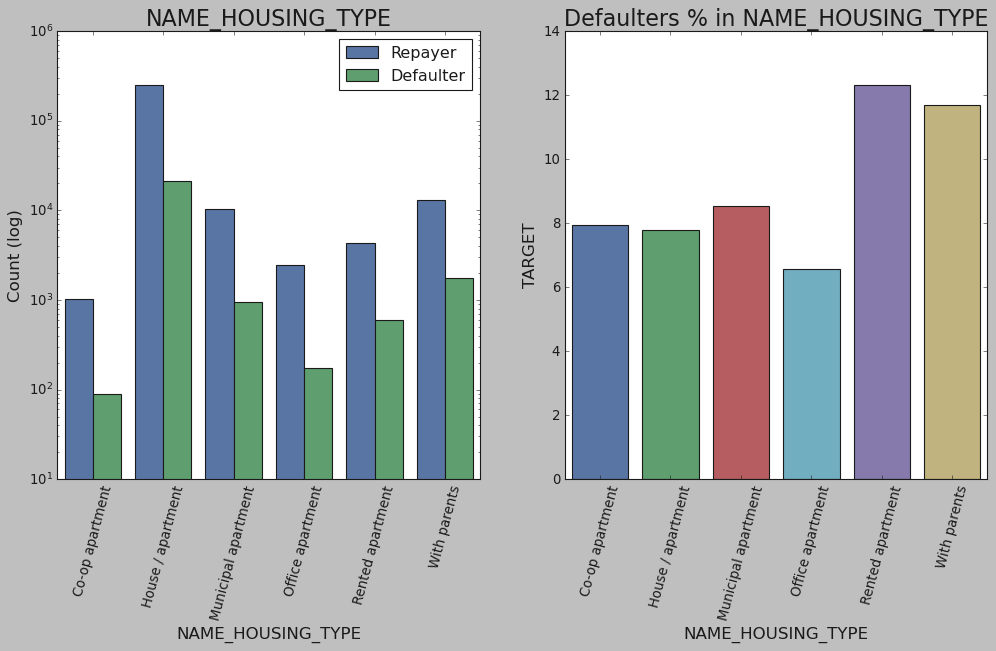

In [348]:
#4 Analyzing Housing Type based on loan repayment status
univariate(df1,"NAME_HOUSING_TYPE","TARGET",True,True,True)

### It is observed that Most of peoples living with Family
### |And the peoples living in rented apartments and with parents having higher defaulter percentage


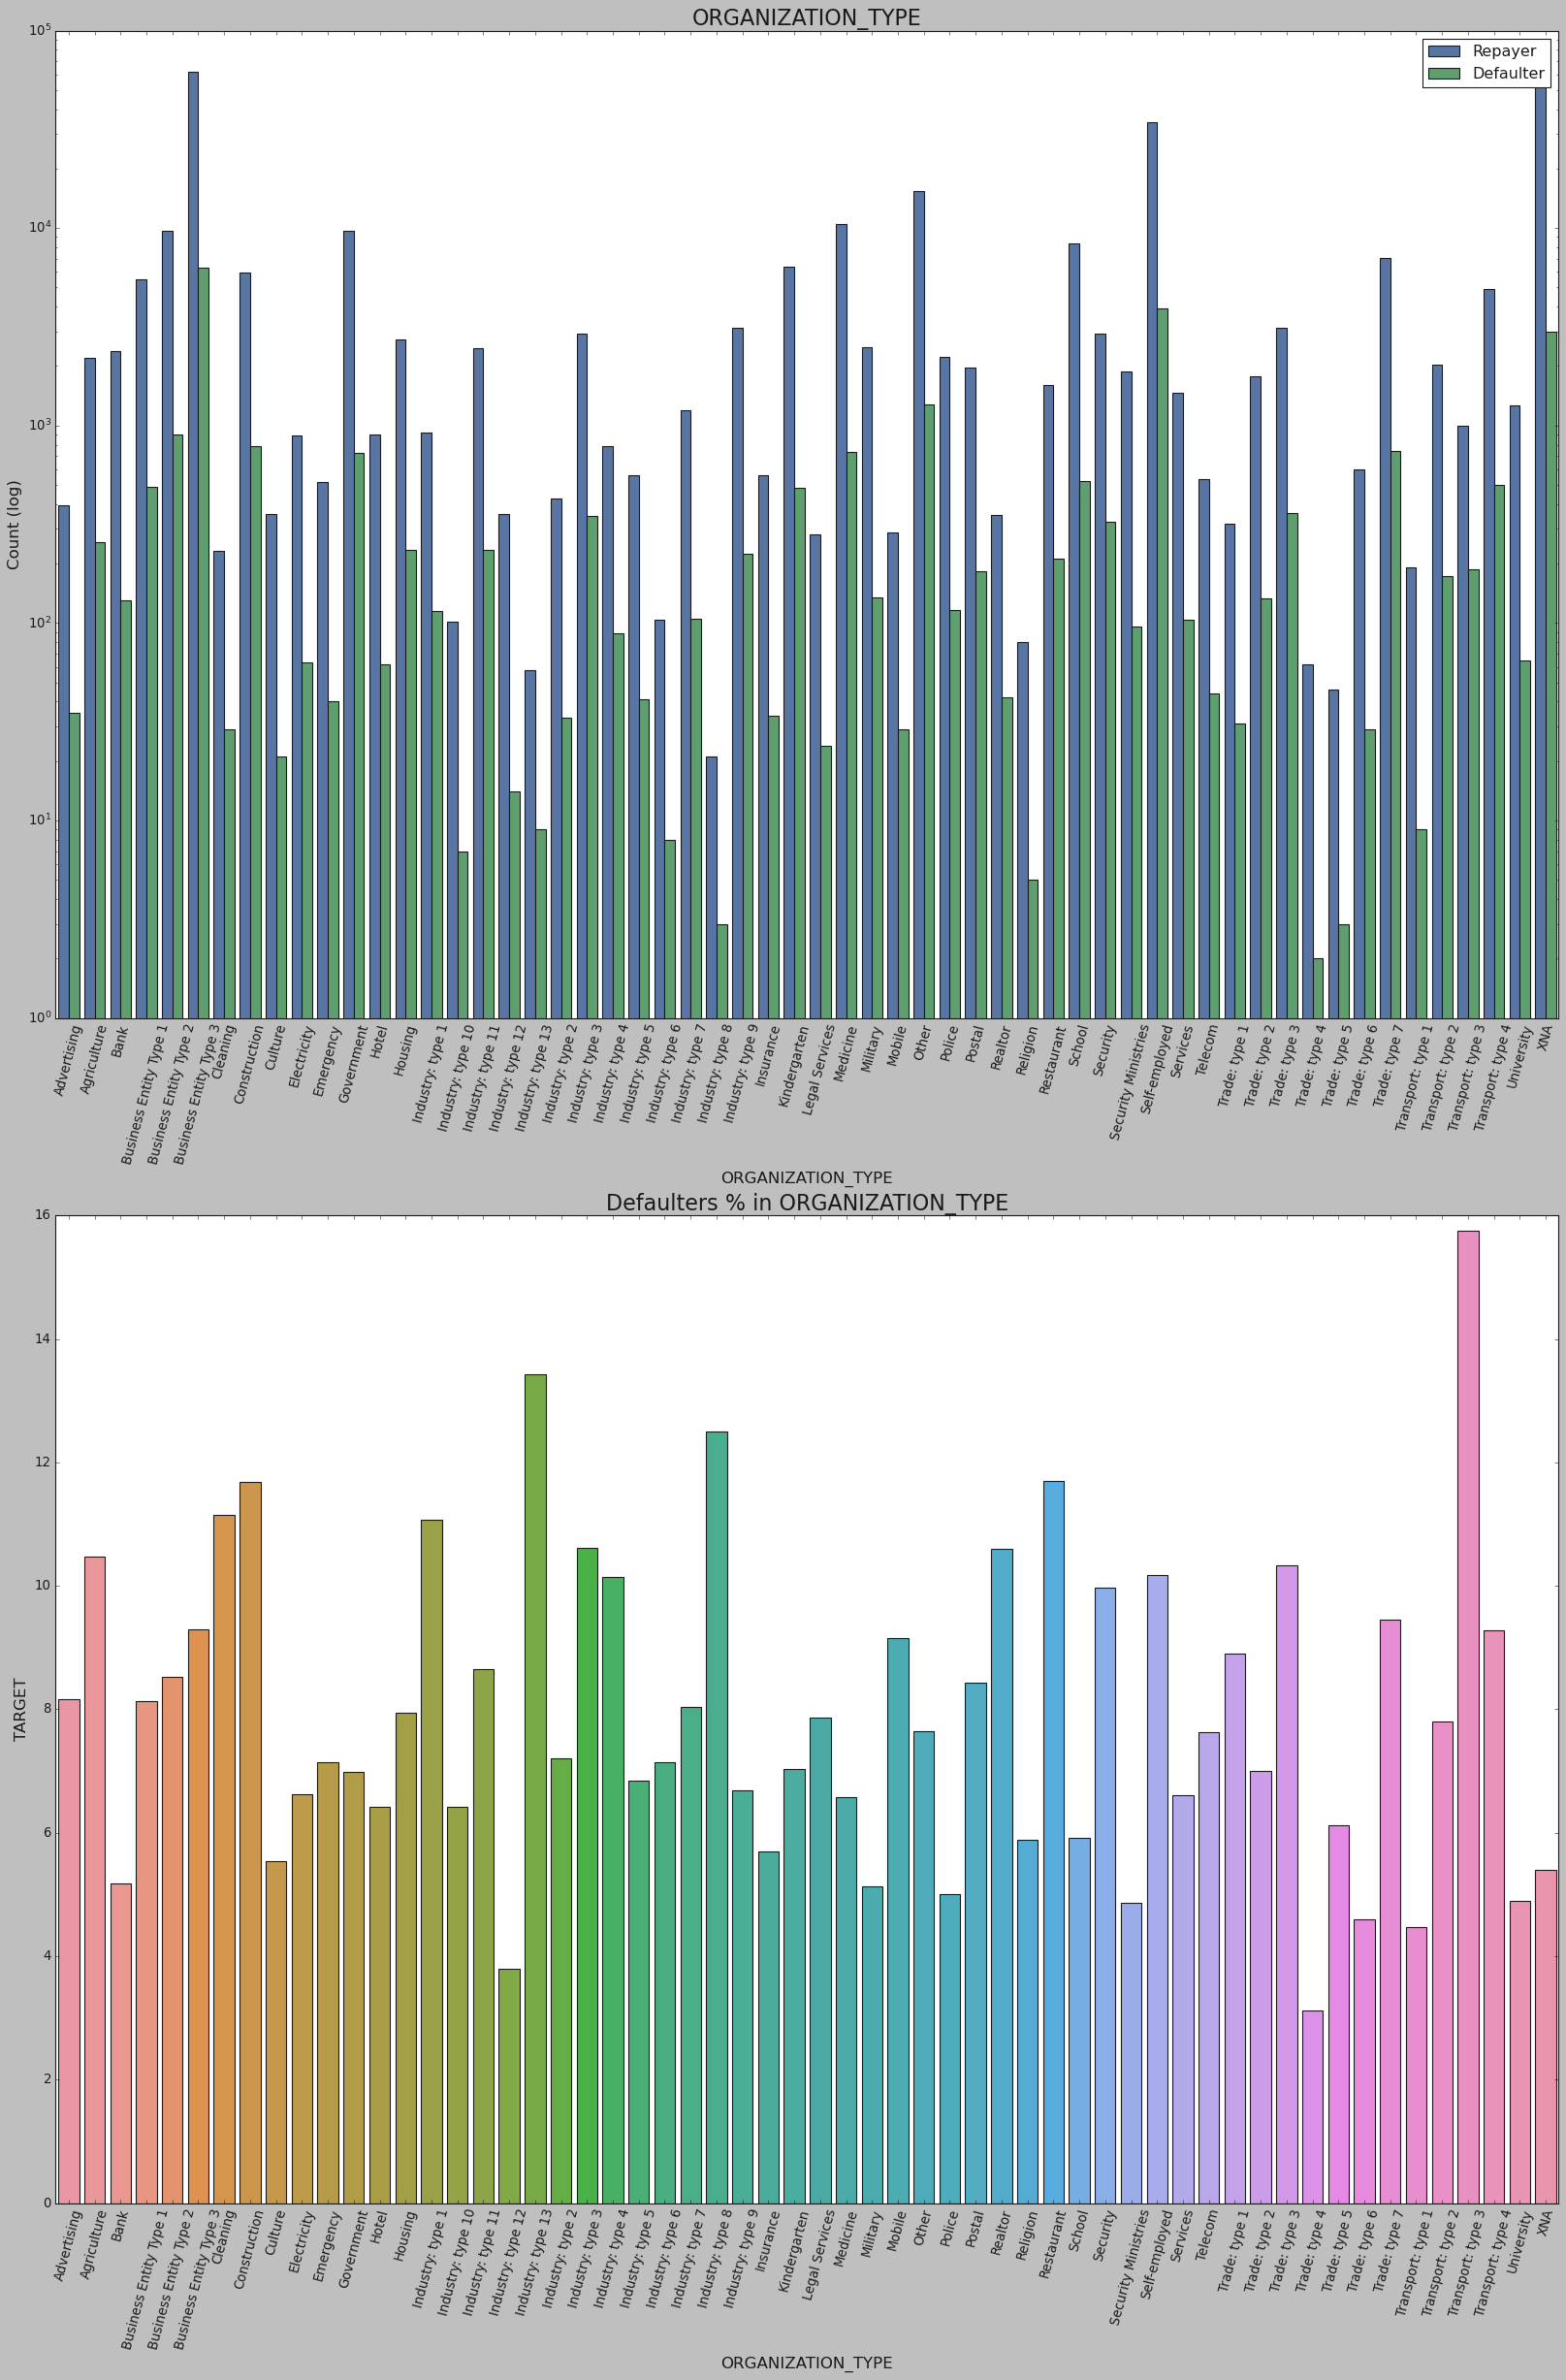

In [349]:
#10 Checking Loan repayment status based on Organization type

univariate(df1,"ORGANIZATION_TYPE","TARGET",True,True,False)

### In Organization Type features its clear that Transport and Industry features are more defaulters

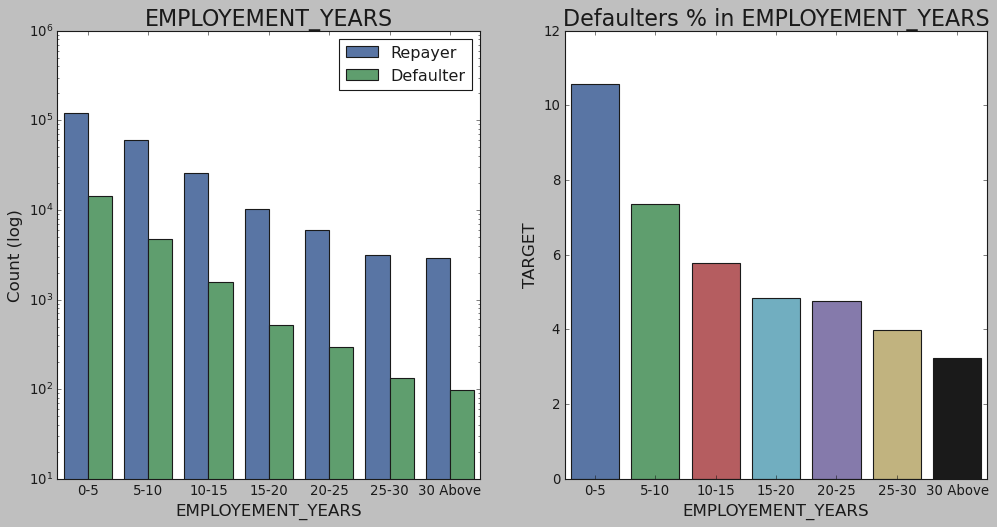

In [351]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(df1,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

### Between 0 - 5 years Employment peoples are more defaulters